In [1]:
import re
import csv
import logging as log
import json


In [2]:
tumor_map_keys=["01", "11", "06"] 

def check_num_tumor_normal_sample(sample_id):

    match = re.search(r'-([0-9]{2})[A-Z]$', sample_id)
    if match:
        num_case = match.group(1)
        if num_case in tumor_map_keys:
            return True
        elif num_case=="10":
            return False
        return None

In [3]:
def split_on_first_or_get_it(row):
    if ", " in row:
        return row.split(', ')[0] 
    else:
        return row

In [4]:
# /media/vincenzo/DE7EF06A7EF03CB9/research/CT-Genomics-AI/geni/dataset/
# C:/Users/nikba/OneDrive - Università degli Studi di Bari/urban/geni/
# /home/vincenzo/CTGenomics

filename_path_pc="/home/vincenzo/CTGenomics/"

In [5]:
filename_sample_sheet=filename_path_pc+"dataset/metadata/gdc_sample_sheet.2025-05-12.tsv"

data={"Tumor":{}, "Normal":{}}
explanation_map = {
    "01": "Tumor sample",
    "10": "Normal sample",
    "11": "Metastatic tumor sample",
    "06": "Cell line sample"
}

with open(filename_sample_sheet) as csvfile:
    lettore = csv.DictReader(csvfile, delimiter='\t')
    for row in lettore:
        if "Tumor" in row['Tissue Type']:
            if ", " in row['Sample ID']:
                temp_case = row['Sample ID'].split(", ")
                result=check_num_tumor_normal_sample(temp_case[0])
                if result: 
                    #data["Tumor"].append(temp_case[0])
                    key_ = split_on_first_or_get_it(row['Case ID'])
                elif result == False:
                    #data["Tumor"].append(temp_case[1])
                    key_ = split_on_first_or_get_it(row['Case ID'])
                elif result == None:
                    log.error(f"Data no formatted in right way")
            else:
                key_ = row['Case ID']
                # check if person is in dict
            if key_ not in data['Tumor']:
                data['Tumor'][key_]=set()
            data['Tumor'][key_].add(f"{row['File ID']}/{row['File Name']}")

        elif "Normal" in row['Tissue Type']:

            # check if person is in dict
            if key_ not in data['Normal']:
                    data['Normal'][key_]=set()
            data['Normal'][key_].add(f"{row['File ID']}/{row['File Name']}")

print(f"Normal -> {len(data['Normal'])}")
print(f"Tumor -> {len(data['Tumor'])}")

print(data)



Normal -> 231
Tumor -> 1098
{'Tumor': {'TCGA-E2-A158': {'0518551d-4df2-4124-b68d-494200c5586b/e75893cc-346b-4567-bdd4-f88f3444a72a.wxs.aliquot_ensemble_masked.maf.gz', 'a8ae4c3f-e77d-4664-b9ae-278d0b6e4e81/d2ce94aa-73c0-4789-b5dd-442bc4f7125a.mirbase21.isoforms.quantification.txt', '27f4c9d4-d6ba-4fea-9f0b-fb06066e69a8/dd1d9d28-3929-4361-a6ff-0ac781fb0ac3.rna_seq.augmented_star_gene_counts.tsv', '4d6a370d-5a30-4f34-b8ff-d4490afcec73/d2ce94aa-73c0-4789-b5dd-442bc4f7125a.mirbase21.mirnas.quantification.txt'}, 'TCGA-B6-A0WW': {'bc98d560-25d3-4e7c-8212-00d1f5148dde/6ff4f8f8-4995-4098-b798-a9f224639999.mirbase21.isoforms.quantification.txt', 'b88178b2-b232-440b-a8db-db4af1e36381/6ff4f8f8-4995-4098-b798-a9f224639999.mirbase21.mirnas.quantification.txt', 'b66c8d20-4b92-40b5-8810-4502266d0a53/efb68702-7e0e-474d-a6b5-2855d963e3da.wxs.aliquot_ensemble_masked.maf.gz', 'e4732dd4-002a-4b37-9a56-d01d551e9cc3/9c1779d3-6e10-413b-9df9-a9378862d8c4.rna_seq.augmented_star_gene_counts.tsv'}, 'TCGA-AN-A03Y

### Checks on data

In [6]:
def convert_sets(obj):
    if isinstance(obj, set):
        return list(obj)
    elif isinstance(obj, dict):
        return {k: convert_sets(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_sets(i) for i in obj]
    else:
        return obj

In [7]:
filename_to_save=filename_path_pc+"dataset/metadata/my_data.json"
with open(filename_to_save, 'w') as file_json:
    json.dump(convert_sets(data), file_json, indent=4)  # indent=4 rende il file leggibile


In [8]:
counter_tumor = 0
# numbe of complete data in Tumor 
for tumor, knonw_values in data['Tumor'].items():
    if len(knonw_values) == 4:
        counter_tumor+=1
print(counter_tumor)

928


In [9]:
counter_normal = 0
# numbe of complete data in Normal 
for normal, knonw_values in data['Normal'].items():
    if len(knonw_values) == 2:
        counter_normal+=1
print(counter_normal)

54


In [10]:
dict_normal_sample ={}

for normal, knonw_values in data['Normal'].items():
    case_=", ".join(knonw_values)
    if case_ not in dict_normal_sample:
        dict_normal_sample[case_] = 0
    dict_normal_sample[case_]+=1

print(json.dumps(dict_normal_sample, indent=4))


{
    "456bc30b-59f8-4427-b798-5b113ca635a0/653ddf67-d2ac-4fc7-8e95-b4a078e27806.rna_seq.augmented_star_gene_counts.tsv, 63970639-a366-42e8-aa18-d072a9fc1770/d5e87214-6346-499a-91dd-1a6cd700e689.mirbase21.mirnas.quantification.txt": 1,
    "a257fbd4-8d85-459a-984c-83040a164db6/70f44ce1-c5c2-42e3-aced-466aa7c181ad.mirbase21.mirnas.quantification.txt": 1,
    "7e17b2bf-91b2-4ea2-acc1-59e1537913ce/8e317da5-4672-4ce6-9890-8f74e85f0d24.mirbase21.isoforms.quantification.txt": 1,
    "50db711e-b2eb-4b33-ae9f-48ce6d860a48/66570de6-ebd0-4c9f-876f-f72bd942040c.mirbase21.mirnas.quantification.txt, 1c73346e-7c14-4b9e-b43d-4478181e0a4a/66570de6-ebd0-4c9f-876f-f72bd942040c.mirbase21.isoforms.quantification.txt": 1,
    "c6a4afd8-8044-475f-b4fd-a1b4cb922976/58bcabc9-6f6b-43c0-bf40-fa9396c6c9d7.rna_seq.augmented_star_gene_counts.tsv": 1,
    "18b0bd2d-505f-4ecb-9bea-b52e6a74cebd/678aa892-0631-47cc-b19e-cdcef42cecb3.rna_seq.augmented_star_gene_counts.tsv": 1,
    "12c76136-cc83-42c0-886b-4b4ea167a0d7/7

In [11]:
def copy_with_limit(original_dict, tumor_limit=300):
    new_dict={"Tumor":{}, "Normal": original_dict["Normal"].copy()}

    tumor_items = list(original_dict["Tumor"].items())[:tumor_limit]
    new_dict["Tumor"] = dict(tumor_items)

    return new_dict 

In [12]:
tumor_num_limit = 10000
limited_dict = copy_with_limit(data, tumor_num_limit)
print(len(limited_dict["Tumor"].items()))
print(len(limited_dict["Normal"].items()))


1098
231


In [13]:
counter_no_gene = 0
list_of_id_to_delete =[] 
for t_or_n, id_positions in limited_dict.items():
    for id_of_barcode, positions in id_positions.items():
        
        sample_parts = []  # Per raccogliere tutti i DataFrame del sample
        types_already_done={}

        check_gene = all("augmented_star_gene_counts" not in p for p in positions)
        if check_gene:
            # print("NO GENE FOR ", id_of_barcode)
            counter_no_gene += 1
            list_of_id_to_delete.append(id_of_barcode)
    print("For ", t_or_n)
    print(counter_no_gene)

For  Tumor
3
For  Normal
127


In [14]:
# dump and import data to pickle file
import gc
import pickle
import pandas as pd
# Example: Dumping a list to a pickle file
def dump_list_to_pickle(my_list, filename):
    """
    Save a list to a pickle file
    
    Args:
        my_list: The list to save
        filename: Name of the file to save to
    """
    with open(filename, 'wb') as file:
        pickle.dump(my_list, file)
   # print(f"List successfully saved to {filename}")

# Example: Loading a list from a pickle file
def load_list_from_pickle(filename):
    """
    Load a list from a pickle file
    
    Args:
        filename: Name of the file to load from
    
    Returns:
        The loaded list
    """
    with open(filename, 'rb') as file:
        loaded_list = pickle.load(file)
    return loaded_list

### Pre-processing

In [15]:
# Function to check for NaN values in a DataFrame and replace them with -1
def check_and_replace_nan_in_dataframe(df, patient_id_column='patient_id'):
    """
    Controlla i valori NaN in un DataFrame, li sostituisce con -1 e fornisce informazioni diagnostiche.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Il DataFrame da analizzare e processare.
    patient_id_column : str, optional
        Nome della colonna contenente gli ID dei pazienti (default: 'patient_id').
    
    Returns:
    --------
    pandas.DataFrame
        Il DataFrame con i valori NaN sostituiti da -1.
    """
    # Verifica presenza di NaN
    has_nan = df.isna().any().any()
    
    if not has_nan:
        print("✅ Il DataFrame non contiene valori NaN")
        return df  # Nessuna modifica necessaria
    
    # Conta il numero totale di NaN
    nan_count = df.isna().sum().sum()
    print(f"⚠️ Il DataFrame contiene {nan_count} valori NaN")
    
    # Distribuzione per colonna (solo colonne con NaN)
    nan_cols = df.isna().sum()
    print("\nNaN per colonna:")
    cols_with_nan = nan_cols[nan_cols > 0]
    for col in cols_with_nan.index:
        print(f"- {col}: {nan_cols[col]} valori mancanti")
    
    # Percentuale di NaN rispetto al totale
    total_cells = df.size
    print(f"\nPercentuale di NaN: {(nan_count/total_cells)*100:.4f}%")
    
    # Stampa i patient_id con NaN
    if patient_id_column in df.columns:
        rows_with_nan = df[df.isna().any(axis=1)]
        print("\nPatient ID con NaN:")
        print(rows_with_nan[patient_id_column].tolist())
    else:
        print(f"⚠️ La colonna '{patient_id_column}' non è presente nel DataFrame.")
    
    # Sostituisci i NaN con -1
    print("\nSostituzione dei valori NaN con -1...")
    df = df.fillna(-1)
    print("✅ Sostituzione completata.")
    
    return df

In [16]:
# Functions to reader csv files and process gene expression, miRNA isoform, and miRNA aggregate data

import pandas as pd
import os
import json
from tqdm import tqdm

def process_gene_expression(file_path, prefix="gene"):
    """
    Elabora il file di espressione genica e lo converte in una singola riga.
    """
    df = pd.read_csv(file_path, sep='\t', comment='#')
    
    # Filtra via le righe che iniziano con N_
    if 'gene_id' in df.columns:
        df = df[~df['gene_id'].str.startswith('N_')]
    
    # Mantieni solo le colonne che ci interessano
    feature_columns = ["unstranded", "stranded_first", "stranded_second", "tpm_unstranded", "fpkm_unstranded", "fpkm_uq_unstranded"]
    required_cols = ["gene_id"] + feature_columns
    
    # Verifica che le colonne esistano
    missing_cols = set(required_cols) - set(df.columns)
    if missing_cols:
        raise ValueError(f"Colonne mancanti nel file {file_path}: {missing_cols}")
    
    # Filtra e rimuovi NA
    #df = df[required_cols].dropna()
    
    # Verifica duplicati
    if df['gene_id'].duplicated().any():
        duplicated_mask = df['gene_id'].duplicated(keep=False)
        duplicate_values = df.loc[duplicated_mask, 'gene_id'].unique()
        
        # Mostra più informazioni sui duplicati
        print(f"Trovati {len(duplicate_values)} geni duplicati in {file_path}")
        print(f"Primi 3 esempi: {', '.join(duplicate_values[:3])}")
        
        # Mostra un esempio dei dati duplicati (con rappresentazione binaria per vedere spazi nascosti)
        first_dup = duplicate_values[0]
        dup_rows = df[df['gene_id'] == first_dup]
        print(f"\nEsempio di righe duplicate per '{first_dup}':")
        print(f"Rappresentazione binaria: {[repr(g) for g in dup_rows['gene_id'].tolist()[:2]]}")
        
        # Continua con la rimozione dei duplicati
        df = df.drop_duplicates(subset=['gene_id'])
    
    # Crea il dizionario dei dati
    row_data = {}
    for feature in feature_columns:
        feature_series = df.set_index('gene_id')[feature]
        feature_series.index = [f"{prefix}_{gene}|{feature}" for gene in feature_series.index]
        row_data.update(feature_series.to_dict())
    
    return row_data

import pandas as pd
import string

import pandas as pd
import string

def process_mirna_isoform(file_path, prefix="mirna_iso"):
    """
    Elabora il file dei miRNA a livello di isoforma con identificatori unici basati su lettere alfabetiche.
    """
    try:
        # Leggi il file
        df = pd.read_csv(file_path, sep='\t', comment='#')
        
        # Mantieni solo le colonne che ci interessano
        feature_columns = ["read_count", "reads_per_million_miRNA_mapped", "miRNA_region"]
        
        # Adatta i nomi delle colonne in base al formato del file
        if "isoform_coords" in df.columns:
            id_col = "miRNA_ID"
            coord_col = "isoform_coords"
        else:
            # Adatta per potenziali differenze nel formato del file
            id_col = next((col for col in df.columns if "miRNA" in col or "mirna" in col), "miRNA_ID")
            coord_col = next((col for col in df.columns if "coord" in col), "isoform_coords")
        
        required_cols = [id_col, coord_col] + [col for col in feature_columns if col in df.columns]
        
        # Verifica che le colonne esistano
        if not all(col in df.columns for col in required_cols):
            # Stampa le colonne disponibili per debugging
            print(f"Colonne disponibili: {df.columns.tolist()}")
            missing = [col for col in required_cols if col not in df.columns]
            raise ValueError(f"Colonne mancanti nel file {file_path}: {missing}")
        
        # Filtra e rimuovi NA
        df = df[required_cols].dropna()
        
        # Aggiungi una lettera alfabetica per rendere ogni riga univoca per miRNA_ID
        df['unique_suffix'] = (
            df.groupby(id_col).cumcount().apply(lambda x: string.ascii_lowercase[x % 26] + (str(x // 26) if x >= 26 else ""))
        )
        df['unique_id'] = df[id_col] + "_" + df['unique_suffix']
        
        # Crea il dizionario dei dati
        row_data = {}
        for feature in feature_columns:
            if feature in df.columns:
                feature_series = df.set_index('unique_id')[feature]
                feature_series.index = [f"{prefix}_{id}|{feature}" for id in feature_series.index]
                row_data.update(feature_series.to_dict())
        
        return row_data
    except Exception as e:
        print(f"Errore durante l'elaborazione del file {file_path}: {e}")
        raise

def process_mirna_aggregate(file_path, prefix="mirna_agg"):
    """
    Elabora il file dei miRNA aggregati.
    """
    df = pd.read_csv(file_path, sep='\t', comment='#')
    
    # Mantieni solo le colonne che ci interessano
    feature_columns = ["read_count", "reads_per_million_miRNA_mapped"]
    
    # Adatta i nomi delle colonne in base al formato del file
    id_col = next((col for col in df.columns if "miRNA" in col or "mirna" in col), "miRNA_ID")
    required_cols = [id_col] + [col for col in feature_columns if col in df.columns]
    
    # Verifica che le colonne esistano
    if not all(col in df.columns for col in required_cols):
        print(f"Colonne disponibili: {df.columns.tolist()}")
        missing = [col for col in required_cols if col not in df.columns]
        raise ValueError(f"Colonne mancanti nel file {file_path}: {missing}")
    
    # Filtra e rimuovi NA
    #df = df[required_cols].dropna()
    
    # Verifica duplicati
    if df[id_col].duplicated().any():
        duplicated_mask = df[id_col].duplicated(keep=False)
        duplicate_values = df.loc[duplicated_mask, id_col].unique()
        print(f"miRNA_ID duplicati in {file_path}: {', '.join(duplicate_values)}")
        df = df.drop_duplicates(subset=[id_col])
    
    # Crea il dizionario dei dati
    row_data = {}
    for feature in feature_columns:
        if feature in df.columns:
            feature_series = df.set_index(id_col)[feature]
            feature_series.index = [f"{prefix}_{id}|{feature}" for id in feature_series.index]
            row_data.update(feature_series.to_dict())
    
    return row_data


In [17]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

# Function to create a complete patient dataset from JSON file paths
def create_patient_dataset_from_json(data, base_dir, output_file=None):
    """
    Crea un dataset completo per tutti i pazienti leggendo i path da un JSON.
    
    Parameters:
    -----------
    data : dict
        Dizionario contenente i path dei file per ogni paziente
    base_dir : str
        Directory di base da combinare con i path relativi nel JSON
    output_file : str, optional
        Percorso dove salvare il dataset finale in formato CSV
        
    Returns:
    --------
    pandas.DataFrame
        Dataset con una riga per paziente e colonne per tutte le features
    """
    
    all_patients_data = []
    # Tieni traccia di un file mirna di esempio per i casi di valori mancanti
    sample_mirna_iso_file = None
    sample_mirna_agg_file = None
    
    # Processa i dati dei pazienti in tutte le categorie
    for category, patients in data.items():
        for patient_id, file_paths in tqdm(patients.items(), desc=f"Elaborazione pazienti {category}"):
            # Inizializza i dati del paziente
            patient_data = {"patient_id": patient_id, "category": category}
            
            # Filtra i file wxs e organizza per tipo
            gene_expr_file = None
            mirna_iso_file = None
            mirna_agg_file = None
            
            for path in file_paths:
                # Salta i file wxs
                if ".wxs." in path:
                    continue
                
                # Identifica il tipo di file in base ai pattern nel nome
                if (("rna_seq" in path or "gene_counts" in path or "star_gene" in path) and 
                    not gene_expr_file):
                    gene_expr_file = os.path.join(base_dir, path)
                elif (("isoforms" in path or "isoform" in path) and 
                    not mirna_iso_file):
                    mirna_iso_file = os.path.join(base_dir, path)
                    # Salva un esempio di file isoform per riferimento futuro
                    if not sample_mirna_iso_file:
                        sample_mirna_iso_file = mirna_iso_file
                elif ((("mirnas" in path or "mirna" in path) and "isoform" not in path) and 
                    not mirna_agg_file):
                    mirna_agg_file = os.path.join(base_dir, path)
                    # Salva un esempio di file mirna per riferimento futuro
                    if not sample_mirna_agg_file:
                        sample_mirna_agg_file = mirna_agg_file
            
            # Se gene expression non è disponibile, scartiamo il paziente
            if not gene_expr_file:
                print(f"Paziente {patient_id} manca del file gene_expr, lo scartiamo.")
                continue
                
            try:
                # Elabora il file di espressione genica
                gene_data = process_gene_expression(gene_expr_file)
                patient_data.update(gene_data)
                
                # Gestione dei file miRNA isoform
                try:
                    if mirna_iso_file:
                        mirna_iso_data = process_mirna_isoform(mirna_iso_file)
                    else:
                        # Se non abbiamo il file, ma abbiamo un esempio, creiamo dati con NaN
                        if sample_mirna_iso_file:
                            print(f"Usando dati segnaposto (NaN) per mirna_iso del paziente {patient_id}")
                            temp_data = process_mirna_isoform(sample_mirna_iso_file)
                            # Imposta tutti i valori a NaN
                            mirna_iso_data = {k: np.nan for k in temp_data.keys()}
                        else:
                            # Se non abbiamo neanche un esempio, saltiamo
                            raise ValueError("Nessun file mirna_iso trovato come riferimento")
                    patient_data.update(mirna_iso_data)
                except FileNotFoundError:
                    print(f"File mirna_iso non trovato per il paziente {patient_id}. Usando segnaposto NaN.")
                    if sample_mirna_iso_file:
                        temp_data = process_mirna_isoform(sample_mirna_iso_file)
                        mirna_iso_data = {k: np.nan for k in temp_data.keys()}
                        patient_data.update(mirna_iso_data)
                    else:
                        print(f"Nessun file di riferimento per mirna_iso. Dati non aggiunti per il paziente {patient_id}.")
                except Exception as e:
                    print(f"Errore nell'elaborazione del mirna_iso per il paziente {patient_id}: {e}")
                    # Continuiamo comunque con il resto dei dati
                
                # Gestione dei file miRNA aggregate
                try:
                    if mirna_agg_file:
                        mirna_agg_data = process_mirna_aggregate(mirna_agg_file)
                    else:
                        # Se non abbiamo il file, ma abbiamo un esempio, creiamo dati con NaN
                        if sample_mirna_agg_file:
                            print(f"Usando dati segnaposto (NaN) per mirna_agg del paziente {patient_id}")
                            temp_data = process_mirna_aggregate(sample_mirna_agg_file)
                            # Imposta tutti i valori a NaN
                            mirna_agg_data = {k: np.nan for k in temp_data.keys()}
                        else:
                            # Se non abbiamo neanche un esempio, saltiamo
                            raise ValueError("Nessun file mirna_agg trovato come riferimento")
                    patient_data.update(mirna_agg_data)
                except FileNotFoundError:
                    print(f"File mirna_agg non trovato per il paziente {patient_id}. Usando segnaposto NaN.")
                    if sample_mirna_agg_file:
                        temp_data = process_mirna_aggregate(sample_mirna_agg_file)
                        mirna_agg_data = {k: np.nan for k in temp_data.keys()}
                        patient_data.update(mirna_agg_data)
                    else:
                        print(f"Nessun file di riferimento per mirna_agg. Dati non aggiunti per il paziente {patient_id}.")
                except Exception as e:
                    print(f"Errore nell'elaborazione del mirna_agg per il paziente {patient_id}: {e}")
                    # Continuiamo comunque con il resto dei dati
                
                all_patients_data.append(patient_data)
            except Exception as e:
                print(f"Errore nell'elaborazione del paziente {patient_id}: {e}")
    
    # Crea il DataFrame
    if not all_patients_data:
        print("Nessun dato paziente trovato!")
        return None
    
    df = pd.DataFrame(all_patients_data)
    
    #check_and_replace_nan_in_dataframe(df)

    # Salva il dataset se richiesto
    """if output_file:
        df.to_csv(output_file, index=False)
        print(f"Dataset salvato in {output_file}")"""
    
    return df

In [18]:
# creation of dataset
base_dir = filename_path_pc + "dataset/"
dataset = create_patient_dataset_from_json(limited_dict, base_dir, filename_path_pc+"dataset/"+"patient_dataset_no_nan.csv")
print(f"Dataset creato con {len(dataset)} pazienti e {len(dataset.columns)} features.")

Elaborazione pazienti Tumor:   0%|          | 5/1098 [00:01<05:10,  3.53it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/8333463d-155e-4ba2-a148-710f895e7411/1809f3c6-7c76-4b0c-bd18-ce8a1468b07b.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/8333463d-155e-4ba2-a148-710f895e7411/1809f3c6-7c76-4b0c-bd18-ce8a1468b07b.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-EW-A1P1. Usando segnaposto NaN.


Elaborazione pazienti Tumor:   2%|▏         | 17/1098 [00:04<04:58,  3.62it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A2-A0CX
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A2-A0CX


Elaborazione pazienti Tumor:   2%|▏         | 26/1098 [00:07<04:54,  3.64it/s]

File mirna_agg non trovato per il paziente TCGA-AO-A12D. Usando segnaposto NaN.


Elaborazione pazienti Tumor:   4%|▎         | 39/1098 [00:10<04:42,  3.75it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/89524f56-87bb-4a23-b1c8-1eaa0e4a9c6f/4d2a183e-316b-43c3-b380-e1fcfe1577d1.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/89524f56-87bb-4a23-b1c8-1eaa0e4a9c6f/4d2a183e-316b-43c3-b380-e1fcfe1577d1.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-PE-A5DD. Usando segnaposto NaN.


Elaborazione pazienti Tumor:   4%|▍         | 47/1098 [00:13<04:59,  3.51it/s]

File mirna_agg non trovato per il paziente TCGA-A2-A0YL. Usando segnaposto NaN.


Elaborazione pazienti Tumor:   7%|▋         | 72/1098 [00:20<04:48,  3.56it/s]

File mirna_agg non trovato per il paziente TCGA-D8-A1X8. Usando segnaposto NaN.


Elaborazione pazienti Tumor:   8%|▊         | 86/1098 [00:23<04:44,  3.55it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/53711cc4-468e-4b13-8ecd-ed0e07d672b3/6b9a555a-ed46-43a8-9c63-5ce206075ede.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/53711cc4-468e-4b13-8ecd-ed0e07d672b3/6b9a555a-ed46-43a8-9c63-5ce206075ede.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-A2-A25A. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  12%|█▏        | 135/1098 [00:37<04:22,  3.67it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/7ad18a12-e2b9-44d1-8a1f-3efe3eff28f3/7b6b8240-5620-45b0-bdf9-3e187cc240f4.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/7ad18a12-e2b9-44d1-8a1f-3efe3eff28f3/7b6b8240-5620-45b0-bdf9-3e187cc240f4.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-A7-A6VY. Usando segnaposto NaN.
File mirna_agg non trovato per il paziente TCGA-A7-A6VY. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  13%|█▎        | 139/1098 [00:38<04:20,  3.68it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/f6b4ca6f-1b94-4d4e-9fa6-ef607b341e02/53f0d084-21af-425e-9654-0cd8e31b0b22.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/f6b4ca6f-1b94-4d4e-9fa6-ef607b341e02/53f0d084-21af-425e-9654-0cd8e31b0b22.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-E9-A1NI. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  15%|█▌        | 168/1098 [00:46<04:16,  3.63it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A0EB
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A0EB


Elaborazione pazienti Tumor:  17%|█▋        | 184/1098 [00:51<04:12,  3.62it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AO-A03P
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AO-A03P


Elaborazione pazienti Tumor:  23%|██▎       | 256/1098 [01:10<03:47,  3.70it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A2-A0YE
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A2-A0YE


Elaborazione pazienti Tumor:  30%|██▉       | 328/1098 [01:30<03:27,  3.70it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-E9-A3HO
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-E9-A3HO


Elaborazione pazienti Tumor:  31%|███       | 339/1098 [01:33<03:28,  3.64it/s]

Paziente TCGA-AR-A0U1 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Tumor:  33%|███▎      | 363/1098 [01:39<03:27,  3.53it/s]

File mirna_agg non trovato per il paziente TCGA-AR-A24O. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  36%|███▌      | 392/1098 [01:47<03:09,  3.73it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A08F
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A8-A08F


Elaborazione pazienti Tumor:  43%|████▎     | 468/1098 [02:08<02:50,  3.70it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A08P
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A8-A08P


Elaborazione pazienti Tumor:  48%|████▊     | 527/1098 [02:24<02:34,  3.69it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-E9-A1NC
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-E9-A1NC


Elaborazione pazienti Tumor:  53%|█████▎    | 579/1098 [02:38<02:16,  3.80it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A09V
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A8-A09V


Elaborazione pazienti Tumor:  57%|█████▋    | 623/1098 [02:49<02:04,  3.81it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AR-A0TW
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AR-A0TW


Elaborazione pazienti Tumor:  57%|█████▋    | 629/1098 [02:51<02:02,  3.83it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AR-A0U0
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AR-A0U0


Elaborazione pazienti Tumor:  58%|█████▊    | 642/1098 [02:54<01:58,  3.86it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A1FD
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A1FD


Elaborazione pazienti Tumor:  63%|██████▎   | 697/1098 [03:09<01:48,  3.71it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A06X
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A8-A06X


Elaborazione pazienti Tumor:  68%|██████▊   | 752/1098 [03:24<01:33,  3.72it/s]

File mirna_agg non trovato per il paziente TCGA-BH-A0AZ. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  69%|██████▊   | 753/1098 [03:24<01:31,  3.75it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/610c7dbe-2f79-4af0-9f88-ccde37e1f374/466215b5-4593-400d-8170-723de4a41428.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/610c7dbe-2f79-4af0-9f88-ccde37e1f374/466215b5-4593-400d-8170-723de4a41428.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-D8-A27F. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  72%|███████▏  | 791/1098 [03:35<01:24,  3.62it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/96d1247d-fb8a-4e4d-96a0-a8d132043675/689d0e18-b8bc-4e7f-90b6-6f05208ed3a8.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/96d1247d-fb8a-4e4d-96a0-a8d132043675/689d0e18-b8bc-4e7f-90b6-6f05208ed3a8.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-D8-A3Z5. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  73%|███████▎  | 802/1098 [03:38<01:20,  3.69it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A2-A0YJ
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A2-A0YJ


Elaborazione pazienti Tumor:  77%|███████▋  | 846/1098 [03:50<01:08,  3.66it/s]

File mirna_agg non trovato per il paziente TCGA-A2-A04P. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  77%|███████▋  | 850/1098 [03:51<01:07,  3.68it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A09W
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A8-A09W


Elaborazione pazienti Tumor:  82%|████████▏ | 903/1098 [04:05<00:53,  3.68it/s]

File mirna_agg non trovato per il paziente TCGA-A7-A26H. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  83%|████████▎ | 914/1098 [04:08<00:49,  3.69it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A08C
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A8-A08C


Elaborazione pazienti Tumor:  87%|████████▋ | 950/1098 [04:18<00:40,  3.70it/s]

Paziente TCGA-C8-A9FZ manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Tumor:  91%|█████████ | 999/1098 [04:31<00:26,  3.69it/s]

Paziente TCGA-AC-A5EI manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Tumor:  92%|█████████▏| 1005/1098 [04:32<00:23,  3.89it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-D8-A1JM
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-D8-A1JM


Elaborazione pazienti Tumor:  93%|█████████▎| 1022/1098 [04:37<00:20,  3.77it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/4d7df8f7-43c2-4947-a15c-dc1cd73d7132/97a8ecaf-5ef9-4da0-9ba0-fed6fd2fc2e2.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/4d7df8f7-43c2-4947-a15c-dc1cd73d7132/97a8ecaf-5ef9-4da0-9ba0-fed6fd2fc2e2.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-BH-AB28. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  93%|█████████▎| 1026/1098 [04:38<00:19,  3.74it/s]

File mirna_agg non trovato per il paziente TCGA-A8-A0A4. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  95%|█████████▌| 1044/1098 [04:43<00:14,  3.69it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/1bbd0662-6be7-4f97-9c49-e827ad5eca17/edd4b22b-6ffb-48c7-bcca-7aa6f0cc4ad5.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/1bbd0662-6be7-4f97-9c49-e827ad5eca17/edd4b22b-6ffb-48c7-bcca-7aa6f0cc4ad5.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-A8-A0AB. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  96%|█████████▌| 1052/1098 [04:45<00:12,  3.69it/s]

Errore nell'elaborazione del paziente TCGA-OL-A66O: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/589dda89-b968-4f26-b3c7-5371dfdb8a90/ae4a5866-347f-4850-b4c8-a009d0765021.rna_seq.augmented_star_gene_counts.tsv'


Elaborazione pazienti Tumor:  96%|█████████▌| 1054/1098 [04:45<00:09,  4.82it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/0f51627e-264d-4073-82e7-c50eae3c7e12/dfb1fbb4-faab-4dc3-a7c2-9c2cd5838153.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/0f51627e-264d-4073-82e7-c50eae3c7e12/dfb1fbb4-faab-4dc3-a7c2-9c2cd5838153.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-BH-A0EA. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  97%|█████████▋| 1065/1098 [04:48<00:09,  3.63it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/8a37c9f4-a187-4536-9c29-41a3aecba27d/b34c0985-ac8d-44a9-8b10-559279fda5f4.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/8a37c9f4-a187-4536-9c29-41a3aecba27d/b34c0985-ac8d-44a9-8b10-559279fda5f4.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-BH-A18K. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  97%|█████████▋| 1066/1098 [04:49<00:08,  3.64it/s]

File mirna_agg non trovato per il paziente TCGA-B6-A0X0. Usando segnaposto NaN.


Elaborazione pazienti Tumor:  98%|█████████▊| 1080/1098 [04:52<00:04,  3.71it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AR-A0TU
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AR-A0TU


Elaborazione pazienti Tumor: 100%|██████████| 1098/1098 [04:57<00:00,  3.69it/s]


Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-B6-A0X1
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-B6-A0X1


Elaborazione pazienti Normal:   0%|          | 1/231 [00:00<01:09,  3.32it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A09R
Paziente TCGA-AR-A24N manca del file gene_expr, lo scartiamo.
Paziente TCGA-A2-A0YL manca del file gene_expr, lo scartiamo.
Paziente TCGA-A8-A096 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:   2%|▏         | 5/231 [00:00<00:23,  9.50it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AO-A0J2
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AO-A0J2


Elaborazione pazienti Normal:   3%|▎         | 6/231 [00:00<00:32,  6.85it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AR-A0TY
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AR-A0TY
Paziente TCGA-BH-A0HK manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:   3%|▎         | 8/231 [00:01<00:32,  6.92it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-E2-A14Q
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-E2-A14Q
Paziente TCGA-PE-A5DD manca del file gene_expr, lo scartiamo.
Paziente TCGA-EW-A1PB manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:   5%|▍         | 11/231 [00:01<00:26,  8.19it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-OL-A66N
Paziente TCGA-BH-A1FJ manca del file gene_expr, lo scartiamo.
Paziente TCGA-A8-A090 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:   6%|▌         | 14/231 [00:01<00:24,  8.98it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A7-A0DB
Paziente TCGA-AC-A3OD manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:   7%|▋         | 16/231 [00:02<00:25,  8.33it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-E2-A109
Paziente TCGA-B6-A0WW manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:   8%|▊         | 18/231 [00:02<00:26,  7.99it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-D8-A1JH
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-D8-A1JH
Paziente TCGA-BH-A0EE manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:   9%|▊         | 20/231 [00:02<00:27,  7.58it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-D8-A1JL


Elaborazione pazienti Normal:   9%|▉         | 21/231 [00:02<00:32,  6.49it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AC-A2FM
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AC-A2FM
Paziente TCGA-AN-A0AR manca del file gene_expr, lo scartiamo.
Paziente TCGA-LL-A5YN manca del file gene_expr, lo scartiamo.
Paziente TCGA-E2-A152 manca del file gene_expr, lo scartiamo.
Paziente TCGA-EW-A2FV manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  11%|█▏        | 26/231 [00:03<00:21,  9.69it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A0C1
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A0C1
Paziente TCGA-EW-A1PD manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  12%|█▏        | 28/231 [00:03<00:22,  9.06it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-C8-A26V
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-C8-A26V
Paziente TCGA-AN-A0XR manca del file gene_expr, lo scartiamo.
Paziente TCGA-AR-A1AM manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  13%|█▎        | 31/231 [00:03<00:20,  9.71it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-OL-A5D7
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-OL-A5D7
Paziente TCGA-E9-A5FK manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  14%|█▍        | 33/231 [00:03<00:21,  9.07it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AR-A1AX
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AR-A1AX


Elaborazione pazienti Normal:  15%|█▍        | 34/231 [00:04<00:26,  7.49it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-E9-A1ND
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-E9-A1ND
Paziente TCGA-E2-A2P5 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  16%|█▌        | 36/231 [00:04<00:26,  7.45it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AR-A1AI
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AR-A1AI
Paziente TCGA-BH-A1EV manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  16%|█▋        | 38/231 [00:04<00:25,  7.46it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-D8-A147
Paziente TCGA-AQ-A04J manca del file gene_expr, lo scartiamo.
Paziente TCGA-AO-A03R manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  18%|█▊        | 41/231 [00:05<00:21,  8.65it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A08R
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A8-A08R
Paziente TCGA-LD-A66U manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  19%|█▊        | 43/231 [00:05<00:22,  8.33it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A1FC
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A1FC
Paziente TCGA-EW-A1OX manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  19%|█▉        | 45/231 [00:05<00:23,  8.07it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A2-A1FZ
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A2-A1FZ
Paziente TCGA-AC-A6IW manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  20%|██        | 47/231 [00:05<00:23,  7.85it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-PL-A8LX


Elaborazione pazienti Normal:  21%|██        | 48/231 [00:06<00:27,  6.65it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AO-A125
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AO-A125


Elaborazione pazienti Normal:  21%|██        | 49/231 [00:06<00:31,  5.74it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AR-A2LK


Elaborazione pazienti Normal:  22%|██▏       | 50/231 [00:06<00:35,  5.16it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A0A1
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A8-A0A1
Paziente TCGA-E9-A1N9 manca del file gene_expr, lo scartiamo.
Paziente TCGA-AR-A1AQ manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  23%|██▎       | 53/231 [00:06<00:25,  6.92it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A8-A09M
Paziente TCGA-D8-A1J8 manca del file gene_expr, lo scartiamo.
Paziente TCGA-A8-A08A manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  24%|██▍       | 56/231 [00:07<00:21,  8.20it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A1ET


Elaborazione pazienti Normal:  25%|██▍       | 57/231 [00:07<00:25,  6.85it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A2-A4S3
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A2-A4S3
Paziente TCGA-AO-A03T manca del file gene_expr, lo scartiamo.
Paziente TCGA-B6-A2IU manca del file gene_expr, lo scartiamo.
Paziente TCGA-E2-A15K manca del file gene_expr, lo scartiamo.
Paziente TCGA-A2-A04N manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  27%|██▋       | 62/231 [00:07<00:16, 10.32it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-GI-A2C9
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-GI-A2C9


Elaborazione pazienti Normal:  28%|██▊       | 64/231 [00:07<00:17,  9.36it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-E2-A1LH
Paziente TCGA-LL-A7T0 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  28%|██▊       | 65/231 [00:08<00:21,  7.73it/s]

Paziente TCGA-D8-A1X9 manca del file gene_expr, lo scartiamo.
Paziente TCGA-A8-A09A manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  30%|██▉       | 69/231 [00:08<00:22,  7.29it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A7-A0DC


Elaborazione pazienti Normal:  30%|███       | 70/231 [00:09<00:25,  6.25it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A07E
Paziente TCGA-GI-A2C8 manca del file gene_expr, lo scartiamo.
Paziente TCGA-PL-A8LV manca del file gene_expr, lo scartiamo.
Paziente TCGA-D8-A1JG manca del file gene_expr, lo scartiamo.
Paziente TCGA-A2-A3XX manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  32%|███▏      | 75/231 [00:09<00:15, 10.11it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A1EN
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A1EN
Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A1F8


Elaborazione pazienti Normal:  33%|███▎      | 77/231 [00:09<00:21,  7.05it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AR-A2LN
Paziente TCGA-BH-A209 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  34%|███▍      | 79/231 [00:10<00:21,  7.03it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A0DP


Elaborazione pazienti Normal:  35%|███▍      | 80/231 [00:10<00:25,  5.95it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-C8-A12Q


Elaborazione pazienti Normal:  35%|███▌      | 81/231 [00:10<00:28,  5.33it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-E9-A1N6
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-E9-A1N6
Paziente TCGA-BH-A18G manca del file gene_expr, lo scartiamo.
Paziente TCGA-B6-A0IC manca del file gene_expr, lo scartiamo.
Paziente TCGA-AR-A24W manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  37%|███▋      | 85/231 [00:11<00:18,  7.80it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-C8-A1HE
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-C8-A1HE
Paziente TCGA-BH-A0BS manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  38%|███▊      | 88/231 [00:11<00:21,  6.59it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-3C-AALJ
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-3C-AALJ


Elaborazione pazienti Normal:  39%|███▊      | 89/231 [00:11<00:24,  5.78it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A18L


Elaborazione pazienti Normal:  39%|███▉      | 90/231 [00:12<00:26,  5.25it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-OL-A6VQ
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-OL-A6VQ
Paziente TCGA-AR-A2LM manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  40%|███▉      | 92/231 [00:12<00:23,  5.84it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A2-A0EP
Paziente TCGA-AN-A0FD manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A1FB manca del file gene_expr, lo scartiamo.
Paziente TCGA-D8-A1XD manca del file gene_expr, lo scartiamo.
Paziente TCGA-A1-A0SP manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A0HN manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  42%|████▏     | 98/231 [00:12<00:12, 10.53it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A0H9
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A0H9
Paziente TCGA-A1-A0SK manca del file gene_expr, lo scartiamo.
Paziente TCGA-E9-A1R5 manca del file gene_expr, lo scartiamo.
Paziente TCGA-GM-A3XG manca del file gene_expr, lo scartiamo.
Paziente TCGA-E2-A1B5 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  45%|████▍     | 103/231 [00:12<00:09, 12.86it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A7-A0CH
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A7-A0CH
Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-E9-A24A


Elaborazione pazienti Normal:  45%|████▌     | 105/231 [00:13<00:14,  8.69it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A18V
Paziente TCGA-E2-A1II manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A0BD manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  47%|████▋     | 108/231 [00:13<00:13,  9.35it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A1FD
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A1FD
Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AQ-A7U7
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AQ-A7U7


Elaborazione pazienti Normal:  48%|████▊     | 110/231 [00:14<00:17,  7.10it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A1-A0SH
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A1-A0SH


Elaborazione pazienti Normal:  48%|████▊     | 111/231 [00:14<00:19,  6.30it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A1FE
Paziente TCGA-D8-A27F manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  49%|████▉     | 113/231 [00:14<00:17,  6.61it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-B6-A0I6
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-B6-A0I6
Paziente TCGA-BH-A0B3 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  50%|████▉     | 115/231 [00:15<00:17,  6.79it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-D8-A1XS
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-D8-A1XS


Elaborazione pazienti Normal:  50%|█████     | 116/231 [00:15<00:19,  5.83it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A18P


Elaborazione pazienti Normal:  51%|█████     | 117/231 [00:15<00:21,  5.30it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A0E7
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A0E7


Elaborazione pazienti Normal:  51%|█████     | 118/231 [00:15<00:23,  4.81it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-D8-A1JK
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-D8-A1JK
Paziente TCGA-HN-A2NL manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  52%|█████▏    | 120/231 [00:16<00:19,  5.61it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A1FM
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A1FM
Paziente TCGA-BH-A18S manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  53%|█████▎    | 122/231 [00:16<00:17,  6.09it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A1EO


Elaborazione pazienti Normal:  53%|█████▎    | 123/231 [00:16<00:19,  5.42it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-D8-A145
Paziente TCGA-BH-A0DZ manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  54%|█████▍    | 125/231 [00:16<00:17,  6.08it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A0DH
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A0DH


Elaborazione pazienti Normal:  55%|█████▍    | 126/231 [00:17<00:19,  5.31it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-MS-A51U
Paziente TCGA-AR-A2LH manca del file gene_expr, lo scartiamo.
Paziente TCGA-A8-A07I manca del file gene_expr, lo scartiamo.
Paziente TCGA-E9-A247 manca del file gene_expr, lo scartiamo.
Paziente TCGA-GM-A2DF manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  57%|█████▋    | 131/231 [00:17<00:11,  8.85it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-C8-A1HN


Elaborazione pazienti Normal:  57%|█████▋    | 132/231 [00:17<00:13,  7.38it/s]

Paziente TCGA-D8-A1XC manca del file gene_expr, lo scartiamo.
Paziente TCGA-A2-A3KD manca del file gene_expr, lo scartiamo.
Paziente TCGA-C8-A131 manca del file gene_expr, lo scartiamo.
Paziente TCGA-EW-A1J5 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  59%|█████▉    | 137/231 [00:18<00:08, 10.73it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-B6-A0RO
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-B6-A0RO
Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-EW-A6SB
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-EW-A6SB


Elaborazione pazienti Normal:  60%|██████    | 139/231 [00:18<00:12,  7.38it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A0BV
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A0BV


Elaborazione pazienti Normal:  61%|██████    | 140/231 [00:18<00:14,  6.45it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A2-A04X
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A2-A04X


Elaborazione pazienti Normal:  61%|██████▏   | 142/231 [00:19<00:17,  5.21it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A7-A13G
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A7-A13G
Paziente TCGA-D8-A3Z6 manca del file gene_expr, lo scartiamo.
Paziente TCGA-GM-A2DM manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  63%|██████▎   | 145/231 [00:19<00:12,  6.86it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A0DE


Elaborazione pazienti Normal:  63%|██████▎   | 146/231 [00:19<00:14,  5.95it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-D8-A1XF
Paziente TCGA-A7-A13E manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  64%|██████▍   | 148/231 [00:20<00:12,  6.42it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-EW-A2FW
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-EW-A2FW


Elaborazione pazienti Normal:  65%|██████▍   | 149/231 [00:20<00:14,  5.59it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A2-A0D4
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A2-A0D4
Paziente TCGA-A2-A0YM manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  65%|██████▌   | 151/231 [00:20<00:13,  6.04it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-E2-A15R


Elaborazione pazienti Normal:  66%|██████▌   | 152/231 [00:21<00:14,  5.38it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A2-A25B
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A2-A25B
Paziente TCGA-A7-A6VV manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A0BQ manca del file gene_expr, lo scartiamo.
Paziente TCGA-D8-A1XA manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A1EW manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  68%|██████▊   | 157/231 [00:21<00:08,  9.09it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-4H-AAAK
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-4H-AAAK
Paziente TCGA-BH-A1F2 manca del file gene_expr, lo scartiamo.
Paziente TCGA-OL-A6VR manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A0DD manca del file gene_expr, lo scartiamo.
Paziente TCGA-A7-A4SE manca del file gene_expr, lo scartiamo.
Paziente TCGA-C8-A1HG manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  71%|███████   | 163/231 [00:21<00:05, 12.75it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AC-A5XS
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AC-A5XS
Paziente TCGA-A2-A4S0 manca del file gene_expr, lo scartiamo.
Paziente TCGA-E2-A153 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  72%|███████▏  | 166/231 [00:21<00:05, 12.09it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A0GY
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A0GY
Paziente TCGA-GM-A2DH manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A6R9 manca del file gene_expr, lo scartiamo.
Paziente TCGA-E2-A15M manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  74%|███████▎  | 170/231 [00:22<00:04, 12.86it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AN-A0FW
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AN-A0FW
Paziente TCGA-GM-A3XL manca del file gene_expr, lo scartiamo.
Paziente TCGA-E9-A3X8 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  75%|███████▍  | 173/231 [00:22<00:04, 12.18it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A7-A26E
Paziente TCGA-A2-A0YC manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A0W4 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  77%|███████▋  | 178/231 [00:23<00:05, 10.44it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A18U
Paziente TCGA-BH-A0BT manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  78%|███████▊  | 180/231 [00:23<00:05,  9.52it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-OL-A66O
Paziente TCGA-BH-A0EA manca del file gene_expr, lo scartiamo.
Paziente TCGA-LL-A5YL manca del file gene_expr, lo scartiamo.
Paziente TCGA-A7-A0D9 manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A42T manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  80%|███████▉  | 184/231 [00:23<00:04, 11.00it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-E9-A243
Paziente TCGA-AR-A24O manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  81%|████████  | 186/231 [00:23<00:04,  9.86it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A18Q


Elaborazione pazienti Normal:  81%|████████  | 187/231 [00:24<00:05,  7.90it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-OL-A5D8
Paziente TCGA-D8-A27H manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  82%|████████▏ | 189/231 [00:24<00:05,  7.83it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A208
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A208


Elaborazione pazienti Normal:  82%|████████▏ | 190/231 [00:24<00:06,  6.37it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A0WA
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A0WA
Paziente TCGA-E2-A1IK manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A1EX manca del file gene_expr, lo scartiamo.
Paziente TCGA-AC-A23H manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  84%|████████▍ | 194/231 [00:24<00:04,  8.78it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-UU-A93S
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-UU-A93S


Elaborazione pazienti Normal:  84%|████████▍ | 195/231 [00:25<00:05,  7.20it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A2-A0EN
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A2-A0EN
Paziente TCGA-WT-AB44 manca del file gene_expr, lo scartiamo.
Paziente TCGA-E9-A1RC manca del file gene_expr, lo scartiamo.
Paziente TCGA-OK-A5Q2 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  86%|████████▌ | 199/231 [00:25<00:03,  9.21it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-D8-A1X7
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-D8-A1X7
Paziente TCGA-E2-A1LS manca del file gene_expr, lo scartiamo.
Paziente TCGA-E2-A14T manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  87%|████████▋ | 202/231 [00:25<00:03,  9.61it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A7-A3J1
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A7-A3J1
Paziente TCGA-E2-A1B6 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  88%|████████▊ | 204/231 [00:26<00:03,  8.84it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AN-A0AJ
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AN-A0AJ
Paziente TCGA-BH-A0DQ manca del file gene_expr, lo scartiamo.
Paziente TCGA-E9-A54X manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  90%|████████▉ | 207/231 [00:26<00:02,  9.50it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AC-A2FB
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AC-A2FB
Paziente TCGA-AC-A2B8 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  90%|█████████ | 209/231 [00:26<00:02,  8.87it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-BH-A1EY
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-BH-A1EY
Paziente TCGA-GM-A3XN manca del file gene_expr, lo scartiamo.
Paziente TCGA-E2-A14U manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  92%|█████████▏| 212/231 [00:26<00:02,  9.42it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A076
Paziente TCGA-BH-A0H7 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  93%|█████████▎| 214/231 [00:27<00:01,  8.80it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-B6-A409
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-B6-A409


Elaborazione pazienti Normal:  93%|█████████▎| 215/231 [00:27<00:02,  7.35it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AN-A0FX
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AN-A0FX


Elaborazione pazienti Normal:  94%|█████████▎| 216/231 [00:27<00:02,  6.18it/s]

Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AO-A0JC


Elaborazione pazienti Normal:  94%|█████████▍| 217/231 [00:28<00:02,  5.48it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AN-A0FS
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AN-A0FS
Paziente TCGA-GM-A2D9 manca del file gene_expr, lo scartiamo.
Paziente TCGA-EW-A2FS manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  95%|█████████▌| 220/231 [00:28<00:01,  7.23it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-E2-A15E
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-E2-A15E
Paziente TCGA-A1-A0SJ manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  96%|█████████▌| 222/231 [00:28<00:01,  7.23it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-A8-A06Z
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A8-A06Z


Elaborazione pazienti Normal:  97%|█████████▋| 223/231 [00:28<00:01,  6.18it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-AC-A3YI
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-AC-A3YI
Paziente TCGA-E2-A1LK manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A18K manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A1FH manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal:  98%|█████████▊| 227/231 [00:29<00:00,  8.72it/s]

Errore durante l'elaborazione del file /home/vincenzo/CTGenomics/dataset/5074a94f-c14e-441f-b006-cd8895a550e5/2f75259d-abc1-44c8-b7ec-4880afe929d5.mirbase21.isoforms.quantification.txt: [Errno 2] No such file or directory: '/home/vincenzo/CTGenomics/dataset/5074a94f-c14e-441f-b006-cd8895a550e5/2f75259d-abc1-44c8-b7ec-4880afe929d5.mirbase21.isoforms.quantification.txt'
File mirna_iso non trovato per il paziente TCGA-A2-A3Y0. Usando segnaposto NaN.
Usando dati segnaposto (NaN) per mirna_agg del paziente TCGA-A2-A3Y0
Paziente TCGA-BH-A1EU manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A0HF manca del file gene_expr, lo scartiamo.
Paziente TCGA-BH-A0B8 manca del file gene_expr, lo scartiamo.


Elaborazione pazienti Normal: 100%|██████████| 231/231 [00:29<00:00,  7.86it/s]

Usando dati segnaposto (NaN) per mirna_iso del paziente TCGA-D8-A27N


Dataset creato con 1201 pazienti e 420227 features.


In [34]:
# conta quanti esempi per ciascuna classe
counts = dataset['category'].value_counts()
print(counts)

category
Tumor     1094
Normal     107
Name: count, dtype: int64


# CatBoost implementation

In [19]:
from catboost import CatBoostClassifier


In [20]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from tqdm import tqdm
import time

class GenomicCatBoostClassifier:
    def __init__(self, df, test_size=0.2, n_splits=5, random_state=42, balance_classes=True):
        """
        Initialize the CatBoost classifier for genomic data

        Parameters:
        -----------
        df : pd.DataFrame        DataFrame containing the dataset
        test_size : float        Fraction of data to hold out for final testing
        n_splits : int           Number of folds for cross validation
        random_state : int       Random seed for reproducibility
        balance_classes : bool   Whether to use CatBoost automatic class balancing
        """
        self.df = df.copy()
        self.test_size = test_size
        self.n_splits = n_splits
        self.random_state = random_state
        self.balance_classes = balance_classes
        self.model = None
        self.feature_importance = None
        self.cv_results = defaultdict(list)
        self.label_encoder = LabelEncoder()
        self.X_test = None
        self.y_test = None
        self.categorical_features = None

    def fix_categorical_features(self):
        """Fix categorical features by converting floats to strings"""
        print("🔧 Fixing categorical features...")
        
        # Identify potential categorical columns
        potential_categorical = [col for col in self.df.columns 
                               if col not in ['patient_id', 'category'] and 
                               (self.df[col].dtype == 'object' or 'miRNA_region' in col)]
        
        print(f"   Found {len(potential_categorical)} potential categorical columns")
        
        # Progress bar for fixing categorical features
        fixed_count = 0
        with tqdm(potential_categorical, desc="Fixing categorical columns", 
                 bar_format='{l_bar}{bar:30}{r_bar}', colour='blue') as pbar:
            for col in pbar:
                original_dtype = self.df[col].dtype
                
                # Convert to string, handling NaN values
                self.df[col] = self.df[col].astype(str)
                
                # Replace 'nan' string with a more meaningful value
                self.df[col] = self.df[col].replace('nan', 'missing')
                
                if original_dtype != 'object':
                    fixed_count += 1
                    pbar.set_postfix({'Fixed': fixed_count})
                
                # Small delay to show progress
                time.sleep(0.01)
        
        print(f"✅ Fixed {fixed_count} columns with float/numeric issues")
        return self

    def load_and_prepare_data(self):
        """Prepare data for training and testing"""
        print("📊 Preparing dataset...")

        # Fix categorical features first
        self.fix_categorical_features()

        # Separate features and target
        X = self.df.drop(['patient_id', 'category'], axis=1)
        y = self.label_encoder.fit_transform(self.df['category'])

        # Stratified hold-out split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=self.test_size,
            stratify=y,
            random_state=self.random_state
        )
        self.X_test, self.y_test = X_test, y_test

        # Identify categorical features (after fixing)
        categorical_features = [col for col in X.columns 
                              if X[col].dtype == 'object' or 'miRNA_region' in col]
        self.categorical_features = categorical_features

        # Additional validation with progress bar
        print("🔍 Validating categorical features...")
        with tqdm(categorical_features[:10], desc="Validating features", 
                 bar_format='{l_bar}{bar:30}{r_bar}', colour='green') as pbar:
            for col in pbar:
                sample_values = X[col].dropna().head(3)
                pbar.set_postfix({'Current': col[:20] + '...' if len(col) > 20 else col})
                
                # Check for any remaining problematic values
                if any(isinstance(val, float) and not pd.isna(val) for val in X[col]):
                    print(f"   ⚠️  WARNING: Still found float values in {col}")
                
                time.sleep(0.05)

        print(f"✅ Dataset prepared: {X.shape[0]} samples, {X.shape[1]} features")
        print(f"    Train: {X_train.shape[0]} samples, Test: {X_test.shape[0]} samples")
        print(f"    🏷️  Categorical features: {len(categorical_features)}")

        return X_train, y_train, categorical_features

    def train_with_stratified_cv(self):
        """Train the model using Stratified K-Fold CV on the training set"""
        X_train, y_train, cat_features = self.load_and_prepare_data()

        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=self.random_state)
        print(f"🎯 Starting Stratified {self.n_splits}-Fold CV on training set...")

        base_params = {
            'iterations': 1000,
            'learning_rate': 0.05,
            'depth': 6,
            'l2_leaf_reg': 3,
            'loss_function': 'Logloss',
            'eval_metric': 'AUC',
            'random_seed': self.random_state,
            'cat_features': cat_features,
            'verbose': False,
            'early_stopping_rounds': 50,
            'use_best_model': True
        }

        if self.balance_classes:
            base_params['auto_class_weights'] = 'Balanced'

        print(f"🏷️ Using {len(cat_features)} categorical features")

        # Cross-validation with progress bar
        cv_splits = list(skf.split(X_train, y_train))
        
        with tqdm(total=self.n_splits, desc="Cross-Validation Progress", 
                 bar_format='{l_bar}{bar:40}{r_bar}{bar:-10b}', colour='cyan') as pbar:
            
            for fold, (tr_idx, val_idx) in enumerate(cv_splits, start=1):
                pbar.set_description(f"Training Fold {fold}/{self.n_splits}")
                
                X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
                y_tr, y_val = y_train[tr_idx], y_train[val_idx]

                try:
                    model = CatBoostClassifier(**base_params)
                    model.fit(X_tr, y_tr, eval_set=(X_val, y_val), plot=False)

                    # Predictions and metrics
                    y_pred = model.predict(X_val)
                    y_proba = model.predict_proba(X_val)[:, 1]
                    auc = roc_auc_score(y_val, y_proba)
                    prec = precision_score(y_val, y_pred, average='weighted')
                    rec = recall_score(y_val, y_pred, average='weighted')
                    f1 = f1_score(y_val, y_pred, average='weighted')

                    # Store results
                    self.cv_results['auc'].append(auc)
                    self.cv_results['precision'].append(prec)
                    self.cv_results['recall'].append(rec)
                    self.cv_results['f1'].append(f1)
                    self.cv_results['feature_importances'].append(model.get_feature_importance())

                    # Update progress bar with current metrics
                    pbar.set_postfix({
                        'AUC': f'{auc:.3f}',
                        'F1': f'{f1:.3f}',
                        'Prec': f'{prec:.3f}'
                    })
                    
                except Exception as e:
                    pbar.set_postfix({'Status': 'ERROR'})
                    print(f"\n❌ Error during Fold {fold}: {str(e)}")
                    
                    # Debug information
                    print(f"    Debug info for problematic features:")
                    for cat_col in cat_features[:5]:  # Check first 5 categorical features
                        unique_vals = X_tr[cat_col].unique()[:10]
                        val_types = [type(val).__name__ for val in unique_vals]
                        print(f"      {cat_col}: {unique_vals} (types: {set(val_types)})")
                    
                    raise e
                
                pbar.update(1)
                time.sleep(0.1)  # Small delay to show progress

        # Aggregate feature importance
        if self.cv_results['feature_importances']:
            self.feature_importance = np.mean(self.cv_results['feature_importances'], axis=0)

            # Train final model on full training set with progress
            print("\n🎓 Training final model on full training set...")
            final_params = base_params.copy()
            final_params.pop('early_stopping_rounds', None)
            final_params.pop('use_best_model', None)
            final_params['verbose'] = 100  # Show progress every 100 iterations

            with tqdm(total=100, desc="Final Model Training", 
                     bar_format='{l_bar}{bar:40}{r_bar}', colour='magenta') as pbar:
                
                self.model = CatBoostClassifier(**final_params)
                
                # Custom callback to update progress bar
                class ProgressCallback:
                    def __init__(self, pbar):
                        self.pbar = pbar
                        self.last_iteration = 0
                    
                    def __call__(self, info):
                        current_iter = info.iteration
                        if current_iter > self.last_iteration:
                            progress = min(int((current_iter / final_params['iterations']) * 100), 100)
                            self.pbar.n = progress
                            self.pbar.set_postfix({'Iteration': f"{current_iter}/{final_params['iterations']}"})
                            self.pbar.refresh()
                            self.last_iteration = current_iter
                        return True
                
                # Note: CatBoost doesn't support custom callbacks in this way,
                # so we'll simulate the progress
                start_time = time.time()
                self.model.fit(X_train, y_train)
                
                # Simulate progress completion
                for i in range(pbar.n, 100):
                    pbar.update(1)
                    time.sleep(0.01)
                
                end_time = time.time()
                pbar.set_postfix({'Duration': f'{end_time - start_time:.1f}s'})
        else:
            print("❌ No successful folds completed - cannot train final model")

        return self

    def print_cv_summary(self):
        """Print cross-validation results summary"""
        if not self.cv_results['auc']:
            print("❌ No CV results available")
            return
            
        print("\n📈 Cross-Validation Summary:")
        print("=" * 50)
        
        metrics = ['auc', 'precision', 'recall', 'f1']
        for metric in metrics:
            values = self.cv_results[metric]
            if values:
                mean_val = np.mean(values)
                std_val = np.std(values)
                print(f"{metric.upper():>10}: {mean_val:.4f} (±{std_val:.4f})")
        
        print("=" * 50)

    def evaluate_on_test(self):
        """Evaluate the trained model on the hold-out test set"""
        if self.model is None or self.X_test is None:
            raise ValueError("Model not trained or test split not available.")

        print("\n🧪 Evaluating on hold-out test set...")
        
        # Progress bar for evaluation
        with tqdm(total=3, desc="Test Evaluation", 
                 bar_format='{l_bar}{bar:30}{r_bar}', colour='yellow') as pbar:
            
            pbar.set_description("Making predictions...")
            y_true = self.y_test
            y_pred = self.model.predict(self.X_test)
            pbar.update(1)
            
            pbar.set_description("Computing probabilities...")
            y_proba = self.model.predict_proba(self.X_test)[:, 1]
            pbar.update(1)
            
            pbar.set_description("Calculating metrics...")
            report = classification_report(y_true, y_pred, target_names=self.label_encoder.classes_)
            auc = roc_auc_score(y_true, y_proba)
            cm = confusion_matrix(y_true, y_pred)
            pbar.update(1)

        print("\n📋 Classification Report:")
        print(report)
        print(f"\n🎯 ROC AUC: {auc:.4f}")
        print("\n📊 Confusion Matrix:")
        print(cm)

        return {
            'classification_report': classification_report(y_true, y_pred, output_dict=True),
            'roc_auc': auc,
            'confusion_matrix': cm
        }

    def get_top_features(self, top_n=20):
        """Return top N most important features"""
        if self.feature_importance is None:
            print("❌ Feature importance not available - train model first")
            return None
            
        features = self.df.drop(['patient_id', 'category'], axis=1).columns
        imp_df = pd.DataFrame({
            'feature': features,
            'importance': self.feature_importance
        }).sort_values('importance', ascending=False)
        
        print(f"\n🏆 Top {top_n} Most Important Features:")
        print("=" * 60)
        
        # Progress bar for displaying features
        with tqdm(total=top_n, desc="Displaying top features", 
                 bar_format='{l_bar}{bar:30}{r_bar}', colour='green') as pbar:
            for i, (_, row) in enumerate(imp_df.head(top_n).iterrows(), 1):
                print(f"{i:>2}. {row['feature']:<40} {row['importance']:>8.2f}")
                pbar.update(1)
                time.sleep(0.02)
        
        print("=" * 60)
        
        return imp_df.head(top_n)




"\n# Installa la libreria tqdm se non l'hai già:\n# pip install tqdm\n\n# Load your data\ndf = pd.read_csv('your_genomic_data.csv')\n\n# Create and train classifier\nclassifier = GenomicCatBoostClassifier(\n    df=df,\n    test_size=0.2,\n    n_splits=5,\n    random_state=42,\n    balance_classes=True\n)\n\n# Train with cross-validation (now with progress bars!)\nclassifier.train_with_stratified_cv()\n\n# Print CV summary\nclassifier.print_cv_summary()\n\n# Evaluate on test set\ntest_results = classifier.evaluate_on_test()\n\n# Get top features\ntop_features = classifier.get_top_features(top_n=20)\n"

In [21]:
# Path to dataset
#csv_path = filename_path_pc + "dataset/" + "patient_dataset_no_nan.csv"

clf = GenomicCatBoostClassifier(
    df=dataset,
    test_size=0.25,
    n_splits=5,
    random_state=123,
    balance_classes=True
)

# 3. Training with Stratified K-Fold CV
clf.train_with_stratified_cv()

# 4. Evaluation
test_results = clf.evaluate_on_test()

# 5. Report
print("=== Test Classification Report ===")
for label, metrics in test_results['classification_report'].items():
    if label in clf.label_encoder.classes_:
        print(f"{label}: Precision={metrics['precision']:.3f}, Recall={metrics['recall']:.3f}, F1={metrics['f1-score']:.3f}")
print(f"Overall ROC AUC: {test_results['roc_auc']:.3f}")

# 6. Confusion matrix
print("=== Confusion Matrix ===")
print(test_results['confusion_matrix'])

# 7. Extracting top features
top_features = clf.get_top_features(top_n=10)
print("\nTop 10 features by importance:")
print(top_features.to_string(index=False))

📊 Preparing dataset...
🔧 Fixing categorical features...
   Found 17501 potential categorical columns


Fixing categorical columns: 100%|██████████████████████████████| 17501/17501 [03:53<00:00, 74.96it/s]


✅ Fixed 0 columns with float/numeric issues
🔍 Validating categorical features...


Validating features: 100%|██████████████████████████████| 10/10 [00:00<00:00, 18.63it/s, Current=mirna_iso_hsa-let-7a...]


✅ Dataset prepared: 1201 samples, 420225 features
    Train: 900 samples, Test: 301 samples
    🏷️  Categorical features: 17501
🎯 Starting Stratified 5-Fold CV on training set...
🏷️ Using 17501 categorical features


Training Fold 5/5: 100%|████████████████████████████████████████| 5/5 [3:06:33<00:00, 2238.60s/it, AUC=1.000, F1=0.994, Prec=0.994]  



🎓 Training final model on full training set...


Final Model Training:   0%|                                        | 0/100 [00:00<?, ?it/s]

0:	total: 12.5s	remaining: 3h 28m 2s
100:	total: 23m 6s	remaining: 3h 25m 40s
200:	total: 46m 6s	remaining: 3h 3m 18s
300:	total: 1h 9m 7s	remaining: 2h 40m 31s
400:	total: 1h 32m 10s	remaining: 2h 17m 41s
500:	total: 1h 55m 11s	remaining: 1h 54m 43s
600:	total: 2h 18m 12s	remaining: 1h 31m 45s
700:	total: 2h 41m 15s	remaining: 1h 8m 46s
800:	total: 3h 4m 18s	remaining: 45m 47s
900:	total: 3h 27m 20s	remaining: 22m 46s
999:	total: 3h 50m 9s	remaining: 0us


Final Model Training: 100%|████████████████████████████████████████| 100/100 [4:02:25<00:00, 145.46s/it, Duration=14545.6s]



🧪 Evaluating on hold-out test set...


Calculating metrics...: 100%|██████████████████████████████| 3/3 [00:16<00:00,  5.39s/it]    



📋 Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      1.00      0.98        27
       Tumor       1.00      1.00      1.00       274

    accuracy                           1.00       301
   macro avg       0.98      1.00      0.99       301
weighted avg       1.00      1.00      1.00       301


🎯 ROC AUC: 0.9995

📊 Confusion Matrix:
[[ 27   0]
 [  1 273]]
=== Test Classification Report ===
Overall ROC AUC: 0.999
=== Confusion Matrix ===
[[ 27   0]
 [  1 273]]

🏆 Top 10 Most Important Features:


Displaying top features:  60%|██████████████████            | 6/10 [00:00<00:00, 58.40it/s]

 1. gene_ENSG00000104888.10|tpm_unstranded       6.57
 2. gene_ENSG00000187824.9|fpkm_unstranded       5.33
 3. gene_ENSG00000154736.6|fpkm_uq_unstranded     4.06
 4. gene_ENSG00000099953.10|tpm_unstranded       3.29
 5. gene_ENSG00000245025.3|fpkm_unstranded       3.22
 6. gene_ENSG00000165197.5|tpm_unstranded        2.52
 7. gene_ENSG00000095321.17|tpm_unstranded       2.40
 8. gene_ENSG00000104415.14|tpm_unstranded       2.18
 9. gene_ENSG00000100154.14|fpkm_uq_unstranded     1.97
10. gene_ENSG00000165197.5|unstranded            1.97


Displaying top features: 100%|██████████████████████████████| 10/10 [00:00<00:00, 48.02it/s]


Top 10 features by importance:
                                   feature  importance
    gene_ENSG00000104888.10|tpm_unstranded    6.568827
    gene_ENSG00000187824.9|fpkm_unstranded    5.328068
 gene_ENSG00000154736.6|fpkm_uq_unstranded    4.064360
    gene_ENSG00000099953.10|tpm_unstranded    3.293563
    gene_ENSG00000245025.3|fpkm_unstranded    3.216221
     gene_ENSG00000165197.5|tpm_unstranded    2.520865
    gene_ENSG00000095321.17|tpm_unstranded    2.399923
    gene_ENSG00000104415.14|tpm_unstranded    2.179506
gene_ENSG00000100154.14|fpkm_uq_unstranded    1.968726
         gene_ENSG00000165197.5|unstranded    1.966053


In [22]:
# Salva il modello addestrato
model_path=filename_path_pc+"catboost_1.cbm"
clf.model.save_model(model_path)
print(f"✅ Modello salvato in: {model_path}")

✅ Modello salvato in: /home/vincenzo/CTGenomics/catboost_1.cbm


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def plot_confusion_matrix(clf, test_results, save_path=None, figsize=(8, 6)):
    """
    Plot confusion matrix as an image using only matplotlib
    
    Parameters:
    -----------
    clf : GenomicCatBoostClassifier
        The trained classifier object
    test_results : dict
        Dictionary containing test results with 'confusion_matrix' key
    save_path : str, optional
        Path to save the figure. If None, only displays the plot
    figsize : tuple, optional
        Figure size (width, height)
    """
    
    # Extract confusion matrix and class names
    cm = test_results['confusion_matrix']
    class_names = clf.label_encoder.classes_
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create custom colormap (blue theme)
    colors = ['white', '#08519c']  # From white to dark blue
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('custom_blues', colors, N=n_bins)
    
    # Create the heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Count', rotation=270, labelpad=20)
    
    # Set ticks and labels
    tick_marks = np.arange(len(class_names))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black",
                   fontsize=16, fontweight='bold')
    
    # Customize the plot
    ax.set_title('Confusion Matrix - CatBoost Genomic Classifier', 
                fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    
    # Calculate and add statistics
    accuracy = np.trace(cm) / np.sum(cm)
    total_samples = np.sum(cm)
    
    # Add metrics text box
    if len(class_names) == 2:
        tn, fp, fn, tp = cm.ravel()
        
        metrics_text = f"""Test Set Performance:
Accuracy: {accuracy:.3f}
Total Samples: {total_samples}

Detailed Metrics:
True Negatives: {tn}
False Positives: {fp}
False Negatives: {fn}  
True Positives: {tp}

ROC AUC: {test_results['roc_auc']:.4f}"""
        
        # Add text box
        props = dict(boxstyle='round', facecolor='lightgray', alpha=0.8)
        ax.text(0.02, 0.02, metrics_text, transform=ax.transAxes, fontsize=9,
                verticalalignment='bottom', bbox=props)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Confusion matrix saved to: {save_path}")
    
    # Display the plot
    plt.show()
    
    return fig

def plot_enhanced_confusion_matrix(clf, test_results, save_path=None, figsize=(15, 10)):
    """
    Enhanced version with multiple visualizations using only matplotlib
    
    Parameters:
    -----------
    clf : GenomicCatBoostClassifier
        The trained classifier object
    test_results : dict
        Dictionary containing test results
    save_path : str, optional
        Path to save the figure
    figsize : tuple, optional
        Figure size (width, height)
    """
    
    # Extract data
    cm = test_results['confusion_matrix']
    class_names = clf.label_encoder.classes_
    
    # Create subplots
    fig = plt.figure(figsize=figsize)
    
    # Define grid layout
    gs = fig.add_gridspec(2, 3, height_ratios=[1, 1], width_ratios=[1, 1, 1])
    
    # 1. Absolute confusion matrix
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Custom colormap
    colors = ['white', '#08519c']
    cmap = LinearSegmentedColormap.from_list('custom_blues', colors, N=100)
    
    im1 = ax1.imshow(cm, interpolation='nearest', cmap=cmap)
    ax1.set_title('Confusion Matrix (Counts)', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    
    # Add tick labels
    tick_marks = np.arange(len(class_names))
    ax1.set_xticks(tick_marks)
    ax1.set_yticks(tick_marks)
    ax1.set_xticklabels(class_names)
    ax1.set_yticklabels(class_names)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax1.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=14, fontweight='bold')
    
    # 2. Normalized confusion matrix
    ax2 = fig.add_subplot(gs[0, 1])
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Green colormap for normalized
    colors_green = ['white', '#00441b']
    cmap_green = LinearSegmentedColormap.from_list('custom_greens', colors_green, N=100)
    
    im2 = ax2.imshow(cm_normalized, interpolation='nearest', cmap=cmap_green, vmin=0, vmax=1)
    ax2.set_title('Normalized by True Class', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Predicted Label')
    ax2.set_ylabel('True Label')
    
    ax2.set_xticks(tick_marks)
    ax2.set_yticks(tick_marks)
    ax2.set_xticklabels(class_names)
    ax2.set_yticklabels(class_names)
    
    # Add normalized text annotations
    thresh_norm = 0.5
    for i in range(cm_normalized.shape[0]):
        for j in range(cm_normalized.shape[1]):
            ax2.text(j, i, format(cm_normalized[i, j], '.2f'),
                    ha="center", va="center",
                    color="white" if cm_normalized[i, j] > thresh_norm else "black",
                    fontsize=12, fontweight='bold')
    
    # 3. Per-class metrics bar plot
    ax3 = fig.add_subplot(gs[0, 2])
    
    if len(class_names) == 2:
        tn, fp, fn, tp = cm.ravel()
        
        # Calculate metrics for each class
        precision_normal = tn / (tn + fn) if (tn + fn) > 0 else 0
    

✅ Confusion matrix saved to: /home/vincenzo/CTGenomics/confusion_matrix.png


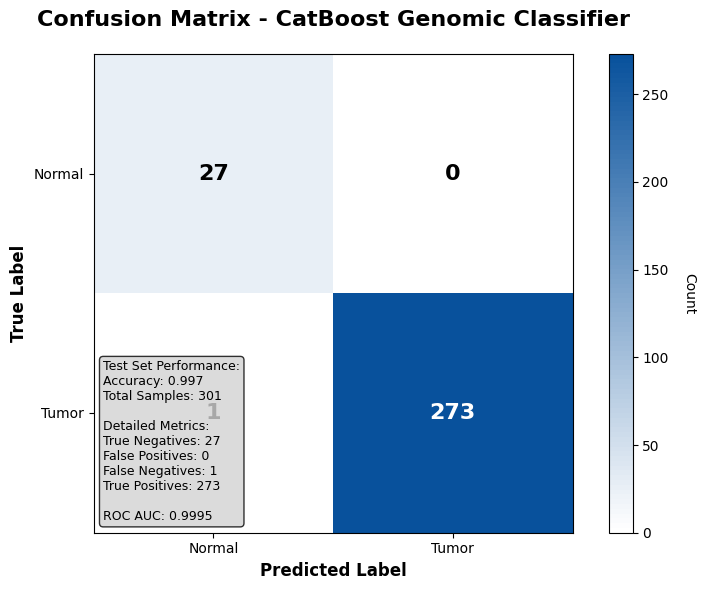

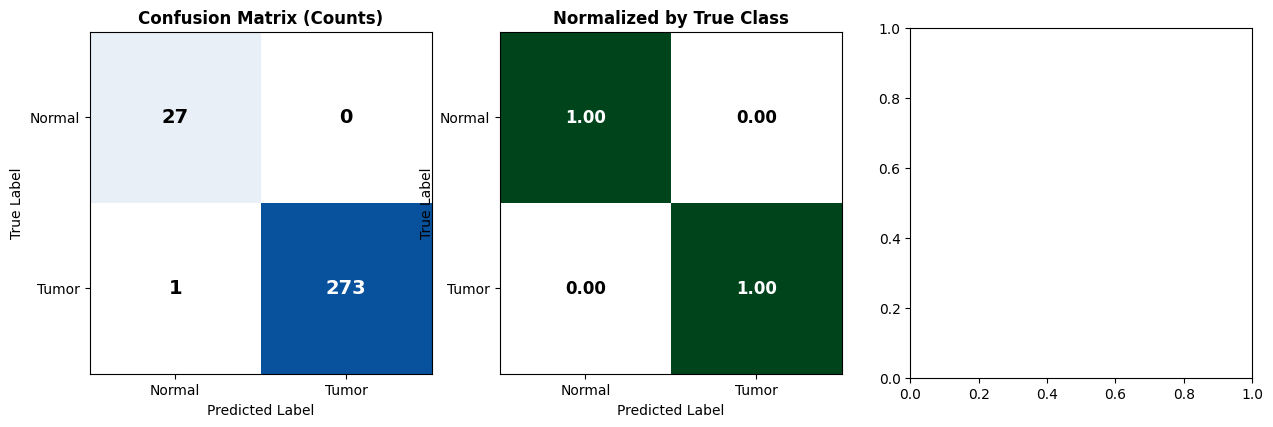

In [26]:
# Dopo il tuo codice esistente...

# Visualizzazione base
plot_confusion_matrix(clf, test_results, save_path=filename_path_pc+"confusion_matrix.png")

# Visualizzazione completa (opzionale)
plot_enhanced_confusion_matrix(clf, test_results, save_path=filename_path_pc+"confusion_matrix_enhanced.png")

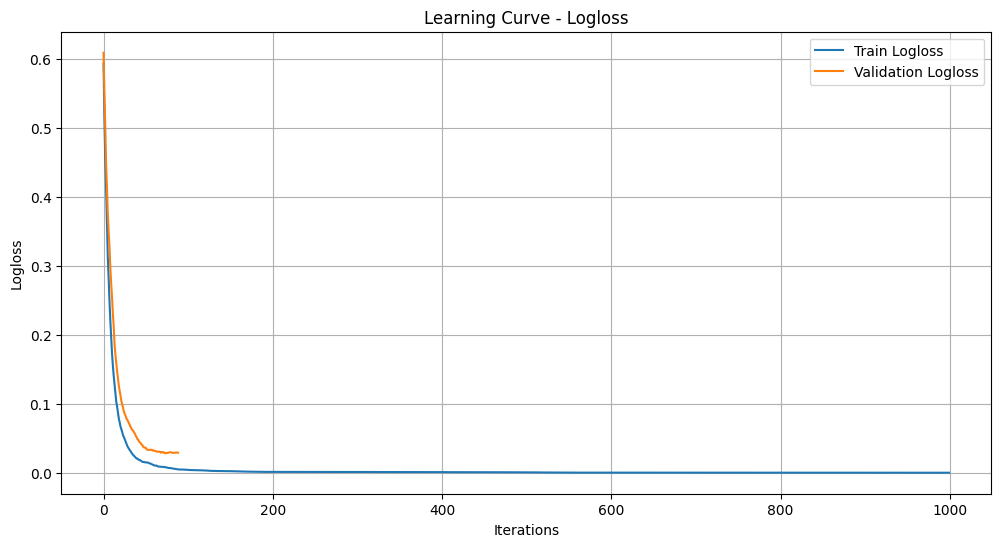

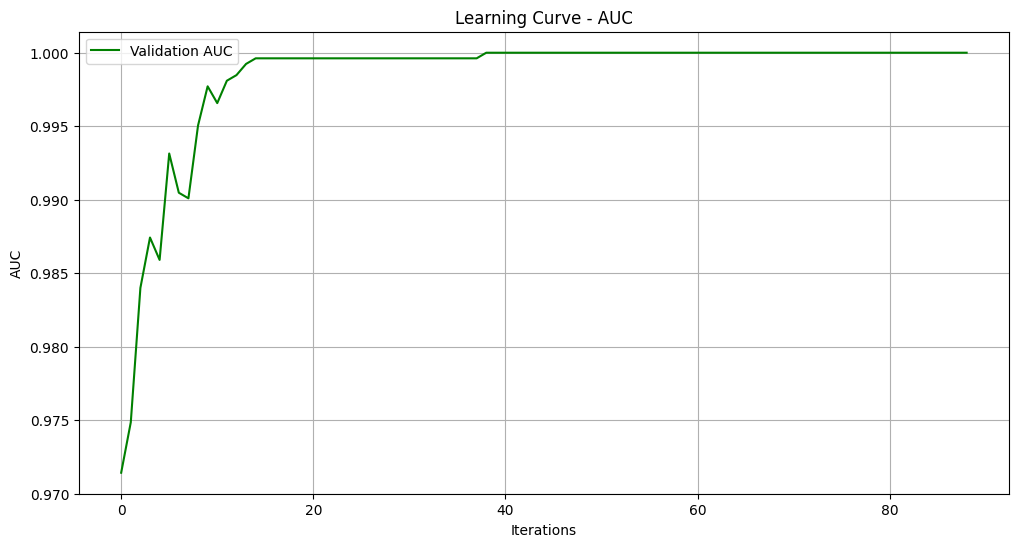

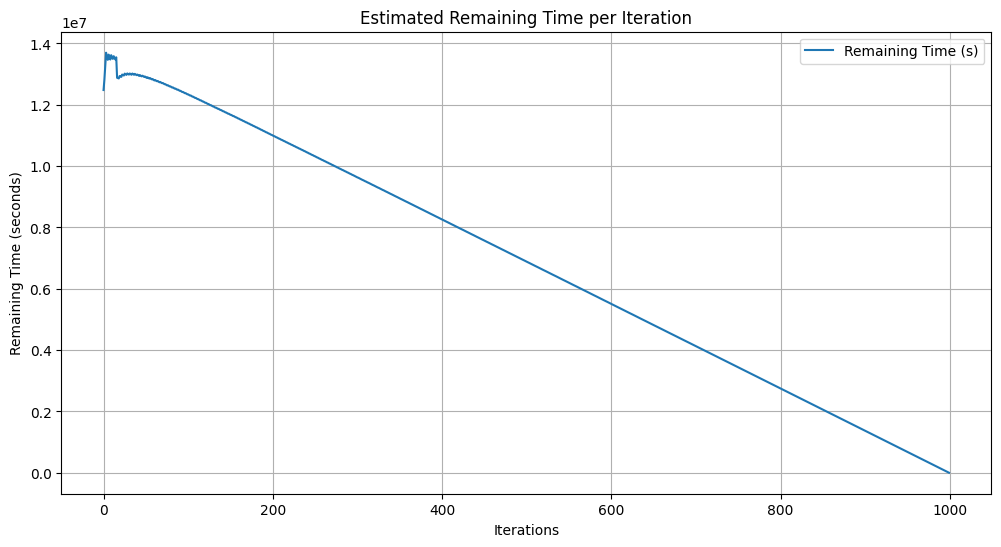

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dei file
learn_error = pd.read_csv(filename_path_pc+'Codice/catboost_info/learn_error.tsv', sep='\t')
test_error = pd.read_csv(filename_path_pc+'Codice/catboost_info/test_error.tsv', sep='\t')
time_left = pd.read_csv(filename_path_pc+'Codice/catboost_info/time_left.tsv', sep='\t')

# =========================
# Learning Curves - Logloss
# =========================
plt.figure(figsize=(12, 6))
plt.plot(learn_error['iter'], learn_error['Logloss'], label='Train Logloss')
plt.plot(test_error['iter'], test_error['Logloss'], label='Validation Logloss')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.title('Learning Curve - Logloss')
plt.legend()
plt.grid(True)
plt.show()

# =========================
# Learning Curve - AUC
# =========================
plt.figure(figsize=(12, 6))
plt.plot(test_error['iter'], test_error['AUC'], label='Validation AUC', color='green')
plt.xlabel('Iterations')
plt.ylabel('AUC')
plt.title('Learning Curve - AUC')
plt.legend()
plt.grid(True)
plt.show()

# =========================
# Tempo Stimato Rimanente
# =========================
plt.figure(figsize=(12, 6))
plt.plot(time_left['iter'], time_left['Remaining'], label='Remaining Time (s)')
plt.xlabel('Iterations')
plt.ylabel('Remaining Time (seconds)')
plt.title('Estimated Remaining Time per Iteration')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# 4. Evaluation
test_results = clf.evaluate_on_test()

# 5. Report
print("=== Test Classification Report ===")
for label, metrics in test_results['classification_report'].items():
    if label in clf.label_encoder.classes_:
        print(f"{label}: Precision={metrics['precision']:.3f}, Recall={metrics['recall']:.3f}, F1={metrics['f1-score']:.3f}")
print(f"Overall ROC AUC: {test_results['roc_auc']:.3f}")

# 6. Confusion matrix
print("=== Confusion Matrix ===")
print(test_results['confusion_matrix'])

# 7. Extracting top features
top_features = clf.get_top_features(top_n=100)
print("\nTop 100 features by importance:")
print(top_features.to_string(index=False))

# ——— Qui salvi in CSV ———
output_path = "top_features.csv"
top_features.to_csv(output_path, index=False)
print(f"\n✅ File CSV creato: {output_path}")


🧪 Evaluating on hold-out test set...


Calculating metrics...: 100%|██████████████████████████████| 3/3 [00:06<00:00,  2.13s/it]    



📋 Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      1.00      0.98        27
       Tumor       1.00      1.00      1.00       274

    accuracy                           1.00       301
   macro avg       0.98      1.00      0.99       301
weighted avg       1.00      1.00      1.00       301


🎯 ROC AUC: 0.9995

📊 Confusion Matrix:
[[ 27   0]
 [  1 273]]
=== Test Classification Report ===
Overall ROC AUC: 0.999
=== Confusion Matrix ===
[[ 27   0]
 [  1 273]]

🏆 Top 100 Most Important Features:


Displaying top features:   6%|█▊                            | 6/100 [00:00<00:01, 58.57it/s]

 1. gene_ENSG00000104888.10|tpm_unstranded       6.57
 2. gene_ENSG00000187824.9|fpkm_unstranded       5.33
 3. gene_ENSG00000154736.6|fpkm_uq_unstranded     4.06
 4. gene_ENSG00000099953.10|tpm_unstranded       3.29
 5. gene_ENSG00000245025.3|fpkm_unstranded       3.22
 6. gene_ENSG00000165197.5|tpm_unstranded        2.52
 7. gene_ENSG00000095321.17|tpm_unstranded       2.40
 8. gene_ENSG00000104415.14|tpm_unstranded       2.18
 9. gene_ENSG00000100154.14|fpkm_uq_unstranded     1.97
10. gene_ENSG00000165197.5|unstranded            1.97


Displaying top features:  18%|█████▍                        | 18/100 [00:00<00:01, 50.81it/s]

11. gene_ENSG00000286214.1|tpm_unstranded        1.92
12. gene_ENSG00000196549.12|tpm_unstranded       1.63
13. gene_ENSG00000138640.15|tpm_unstranded       1.63
14. gene_ENSG00000188322.8|tpm_unstranded        1.59
15. gene_ENSG00000124440.16|fpkm_uq_unstranded     1.51
16. gene_ENSG00000165972.13|fpkm_uq_unstranded     1.48
17. gene_ENSG00000263400.8|tpm_unstranded        1.41
18. gene_ENSG00000154721.15|unstranded           1.37
19. gene_ENSG00000196549.12|stranded_second      1.34
20. gene_ENSG00000249249.2|fpkm_unstranded       1.31


Displaying top features:  30%|█████████                     | 30/100 [00:00<00:01, 49.37it/s]

21. gene_ENSG00000263429.3|fpkm_unstranded       1.14
22. gene_ENSG00000134121.10|fpkm_unstranded      1.03
23. gene_ENSG00000123500.10|fpkm_unstranded      1.02
24. gene_ENSG00000211825.1|stranded_first        0.91
25. gene_ENSG00000137960.6|unstranded            0.90
26. gene_ENSG00000161649.13|stranded_second      0.88
27. gene_ENSG00000166946.14|tpm_unstranded       0.79
28. gene_ENSG00000099953.10|stranded_first       0.73
29. gene_ENSG00000154065.17|tpm_unstranded       0.72
30. gene_ENSG00000245812.3|tpm_unstranded        0.65


Displaying top features:  40%|████████████                  | 40/100 [00:00<00:01, 49.02it/s]

31. gene_ENSG00000065491.8|fpkm_uq_unstranded     0.64
32. gene_ENSG00000137727.12|fpkm_uq_unstranded     0.64
33. gene_ENSG00000123500.10|fpkm_uq_unstranded     0.62
34. gene_ENSG00000187730.9|fpkm_uq_unstranded     0.60
35. gene_ENSG00000164587.13|stranded_second      0.60
36. gene_ENSG00000151789.12|fpkm_unstranded      0.59
37. gene_ENSG00000130032.17|fpkm_unstranded      0.59
38. mirna_agg_hsa-mir-32|reads_per_million_miRNA_mapped     0.54
39. gene_ENSG00000230587.2|stranded_second       0.53
40. gene_ENSG00000196549.12|fpkm_uq_unstranded     0.52


Displaying top features:  50%|███████████████               | 50/100 [00:01<00:01, 48.79it/s]

41. gene_ENSG00000168497.5|fpkm_uq_unstranded     0.52
42. gene_ENSG00000235297.3|fpkm_unstranded       0.51
43. gene_ENSG00000255532.1|fpkm_unstranded       0.49
44. gene_ENSG00000150471.16|fpkm_uq_unstranded     0.48
45. gene_ENSG00000274114.2|tpm_unstranded        0.48
46. gene_ENSG00000138688.15|fpkm_uq_unstranded     0.48
47. mirna_agg_hsa-mir-182|reads_per_million_miRNA_mapped     0.47
48. gene_ENSG00000215386.13|fpkm_unstranded      0.46
49. gene_ENSG00000183155.5|fpkm_unstranded       0.45
50. gene_ENSG00000229246.2|unstranded            0.43


Displaying top features:  60%|██████████████████            | 60/100 [00:01<00:00, 48.84it/s]

51. gene_ENSG00000229246.2|fpkm_uq_unstranded     0.42
52. gene_ENSG00000206384.10|fpkm_uq_unstranded     0.42
53. gene_ENSG00000123485.12|fpkm_unstranded      0.41
54. gene_ENSG00000106511.6|stranded_second       0.40
55. gene_ENSG00000261104.1|stranded_first        0.39
56. gene_ENSG00000123243.15|unstranded           0.39
57. mirna_iso_hsa-mir-210_c|read_count           0.39
58. gene_ENSG00000161594.7|tpm_unstranded        0.38
59. gene_ENSG00000132561.14|fpkm_unstranded      0.36
60. gene_ENSG00000173757.10|fpkm_unstranded      0.36


Displaying top features:  70%|█████████████████████         | 70/100 [00:01<00:00, 48.87it/s]

61. gene_ENSG00000244625.7|fpkm_unstranded       0.35
62. gene_ENSG00000165072.10|fpkm_unstranded      0.35
63. gene_ENSG00000168079.17|fpkm_unstranded      0.34
64. gene_ENSG00000244513.7|tpm_unstranded        0.34
65. gene_ENSG00000165072.10|tpm_unstranded       0.33
66. mirna_iso_hsa-mir-505_o|reads_per_million_miRNA_mapped     0.32
67. gene_ENSG00000123243.15|stranded_second      0.31
68. gene_ENSG00000130226.17|tpm_unstranded       0.31
69. gene_ENSG00000091436.17|fpkm_uq_unstranded     0.31
70. gene_ENSG00000236003.1|fpkm_unstranded       0.29


Displaying top features:  80%|████████████████████████      | 80/100 [00:01<00:00, 48.54it/s]

71. gene_ENSG00000025423.11|unstranded           0.28
72. gene_ENSG00000196862.10|stranded_first       0.28
73. mirna_iso_hsa-mir-508_c|reads_per_million_miRNA_mapped     0.27
74. gene_ENSG00000167910.4|fpkm_unstranded       0.26
75. gene_ENSG00000152580.8|fpkm_unstranded       0.26
76. gene_ENSG00000119771.15|fpkm_uq_unstranded     0.26
77. gene_ENSG00000163827.13|fpkm_unstranded      0.26
78. gene_ENSG00000087087.20|unstranded           0.26
79. gene_ENSG00000123500.10|unstranded           0.26
80. gene_ENSG00000143578.16|fpkm_uq_unstranded     0.26


Displaying top features:  90%|███████████████████████████   | 90/100 [00:01<00:00, 48.59it/s]

81. gene_ENSG00000164972.13|fpkm_uq_unstranded     0.24
82. mirna_iso_hsa-mir-183_c1|miRNA_region        0.24
83. gene_ENSG00000248210.2|fpkm_unstranded       0.24
84. gene_ENSG00000229567.1|unstranded            0.23
85. gene_ENSG00000173660.12|unstranded           0.23
86. gene_ENSG00000165072.10|stranded_second      0.23
87. gene_ENSG00000008405.12|stranded_second      0.23
88. gene_ENSG00000187824.9|fpkm_uq_unstranded     0.23
89. gene_ENSG00000087586.18|stranded_second      0.22
90. gene_ENSG00000158571.11|stranded_first       0.21


Displaying top features: 100%|██████████████████████████████| 100/100 [00:02<00:00, 48.71it/s]

91. gene_ENSG00000218586.3|fpkm_uq_unstranded     0.21
92. gene_ENSG00000168890.14|fpkm_uq_unstranded     0.21
93. gene_ENSG00000228288.7|fpkm_unstranded       0.21
94. mirna_iso_hsa-mir-182_f1|reads_per_million_miRNA_mapped     0.20
95. mirna_iso_hsa-mir-141_p|reads_per_million_miRNA_mapped     0.20
96. gene_ENSG00000165197.5|stranded_second       0.20
97. gene_ENSG00000273079.6|fpkm_unstranded       0.19
98. gene_ENSG00000260442.5|stranded_first        0.19
99. mirna_agg_hsa-mir-153-1|reads_per_million_miRNA_mapped     0.17
100. gene_ENSG00000177098.9|fpkm_uq_unstranded     0.17


Displaying top features: 100%|██████████████████████████████| 100/100 [00:02<00:00, 48.69it/s]


Top 100 features by importance:
                                                feature  importance
                 gene_ENSG00000104888.10|tpm_unstranded    6.568827
                 gene_ENSG00000187824.9|fpkm_unstranded    5.328068
              gene_ENSG00000154736.6|fpkm_uq_unstranded    4.064360
                 gene_ENSG00000099953.10|tpm_unstranded    3.293563
                 gene_ENSG00000245025.3|fpkm_unstranded    3.216221
                  gene_ENSG00000165197.5|tpm_unstranded    2.520865
                 gene_ENSG00000095321.17|tpm_unstranded    2.399923
                 gene_ENSG00000104415.14|tpm_unstranded    2.179506
             gene_ENSG00000100154.14|fpkm_uq_unstranded    1.968726
                      gene_ENSG00000165197.5|unstranded    1.966053
                  gene_ENSG00000286214.1|tpm_unstranded    1.916417
                 gene_ENSG00000196549.12|tpm_unstranded    1.629986
                 gene_ENSG00000138640.15|tpm_unstranded    1.628602
               

In [39]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from tqdm import tqdm
import time

class GenomicCatBoostClassifier2:
    def __init__(self, df, test_size=0.2, n_splits=5, random_state=42, balance_classes=True):
        """
        Initialize the CatBoost classifier for genomic data.
        """
        self.df = df.copy()
        self.test_size = test_size
        self.n_splits = n_splits
        self.random_state = random_state
        self.balance_classes = balance_classes
        self.model = None
        self.feature_importance = None
        self.cv_results = defaultdict(list)
        self.label_encoder = LabelEncoder()
        self.X_test = None
        self.y_test = None
        self.categorical_features = None

    def fix_categorical_features(self):
        """Fix categorical features by converting floats to strings."""
        print("🔧 Fixing categorical features...")

        potential_categorical = [
            col for col in self.df.columns
            if col not in ['patient_id', 'category'] and 
            (self.df[col].dtype == 'object' or 'miRNA_region' in col)
        ]
        print(f"   Found {len(potential_categorical)} potential categorical columns")

        fixed_count = 0
        with tqdm(potential_categorical, desc="Fixing categorical columns", 
                  bar_format='{l_bar}{bar:30}{r_bar}', colour='blue') as pbar:
            for col in pbar:
                original_dtype = self.df[col].dtype
                self.df[col] = self.df[col].astype(str).replace('nan', 'missing')
                if original_dtype != 'object':
                    fixed_count += 1
                    pbar.set_postfix({'Fixed': fixed_count})
                time.sleep(0.01)
        
        print(f"✅ Fixed {fixed_count} columns with float/numeric issues")
        return self

    def load_and_prepare_data(self):
        """Prepare data for training and testing."""
        print("📊 Preparing dataset...")

        self.fix_categorical_features()
        X = self.df.drop(['patient_id', 'category'], axis=1)
        y = self.label_encoder.fit_transform(self.df['category'])

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, stratify=y, random_state=self.random_state
        )
        self.X_test, self.y_test = X_test, y_test

        categorical_features = [
            col for col in X.columns if X[col].dtype == 'object' or 'miRNA_region' in col
        ]
        self.categorical_features = categorical_features

        print(f"✅ Dataset prepared: {X.shape[0]} samples, {X.shape[1]} features")
        print(f"    Train: {X_train.shape[0]} samples, Test: {X_test.shape[0]} samples")
        print(f"    🏷️  Categorical features: {len(categorical_features)}")

        return X_train, y_train, categorical_features

    def train_with_stratified_cv(self):
        """Train the model using Stratified K-Fold CV on the training set and log metrics for each fold."""
        X_train, y_train, cat_features = self.load_and_prepare_data()

        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=self.random_state)
        print(f"🎯 Starting Stratified {self.n_splits}-Fold CV on training set...")

        base_params = {
            'iterations': 1000,
            'learning_rate': 0.05,
            'depth': 6,
            'l2_leaf_reg': 3,
            'loss_function': 'Logloss',
            'eval_metric': 'AUC',
            'random_seed': self.random_state,
            'cat_features': cat_features,
            'verbose': False,
            'early_stopping_rounds': 50,
            'use_best_model': True
        }

        if self.balance_classes:
            base_params['auto_class_weights'] = 'Balanced'

        cv_splits = list(skf.split(X_train, y_train))
        all_fold_metrics = []

        with tqdm(total=self.n_splits, desc="Cross-Validation Progress", colour='cyan') as pbar:
            for fold, (tr_idx, val_idx) in enumerate(cv_splits, start=1):
                X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
                y_tr, y_val = y_train[tr_idx], y_train[val_idx]

                try:
                    model = CatBoostClassifier(**base_params)
                    model.fit(X_tr, y_tr, eval_set=(X_val, y_val), plot=False)

                    y_pred = model.predict(X_val)
                    y_proba = model.predict_proba(X_val)[:, 1]
                    auc = roc_auc_score(y_val, y_proba)
                    prec = precision_score(y_val, y_pred, average='weighted')
                    rec = recall_score(y_val, y_pred, average='weighted')
                    f1 = f1_score(y_val, y_pred, average='weighted')

                    self.cv_results['auc'].append(auc)
                    self.cv_results['precision'].append(prec)
                    self.cv_results['recall'].append(rec)
                    self.cv_results['f1'].append(f1)
                    self.cv_results['feature_importances'].append(model.get_feature_importance())

                    fold_metrics = {
                        'Fold': fold,
                        'AUC': auc,
                        'Precision': prec,
                        'Recall': rec,
                        'F1': f1
                    }
                    all_fold_metrics.append(fold_metrics)
                    print(f"Metrics for Fold {fold}: {fold_metrics}")

                except Exception as e:
                    print(f"Error during Fold {fold}: {str(e)}")
                    raise e

                pbar.update(1)

        if self.cv_results['feature_importances']:
            self.feature_importance = np.mean(self.cv_results['feature_importances'], axis=0)

        print("\n📘 Training final model on full training set...")
        final_params = base_params.copy()
        self.model = CatBoostClassifier(**final_params)
        self.model.fit(X_train, y_train)

        return all_fold_metrics

    def print_cv_summary(self):
        """Print cross-validation results summary."""
        if not self.cv_results['auc']:
            print("No CV results available")
            return
            
        print("\n📈 Cross-Validation Summary:")
        print("=" * 50)
        
        metrics = ['auc', 'precision', 'recall', 'f1']
        for metric in metrics:
            values = self.cv_results[metric]
            if values:
                mean_val = np.mean(values)
                std_val = np.std(values)
                print(f"{metric.upper():>10}: {mean_val:.4f} (±{std_val:.4f})")
        
        print("=" * 50)

    def evaluate_on_test(self):
        """Evaluate the trained model on the hold-out test set."""
        if self.model is None or self.X_test is None:
            raise ValueError("Model not trained or test split not available.")

        print("\n🧪 Evaluating on hold-out test set...")
        y_true = self.y_test
        y_pred = self.model.predict(self.X_test)
        y_proba = self.model.predict_proba(self.X_test)[:, 1]

        report = classification_report(y_true, y_pred, target_names=self.label_encoder.classes_)
        auc = roc_auc_score(y_true, y_proba)
        cm = confusion_matrix(y_true, y_pred)

        print("\n📋 Classification Report:")
        print(report)
        print(f"\n🎯 ROC AUC: {auc:.4f}")
        print("\n📊 Confusion Matrix:")
        print(cm)

        return {
            'classification_report': classification_report(y_true, y_pred, output_dict=True),
            'roc_auc': auc,
            'confusion_matrix': cm
        }

    def get_top_features(self, top_n=20):
        """Return top N most important features."""
        if self.feature_importance is None:
            print("❌ import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from tqdm import tqdm
import time

class GenomicCatBoostClassifier:
    def __init__(self, df, test_size=0.2, n_splits=5, random_state=42, balance_classes=True):
        """
        Initialize the CatBoost classifier for genomic data.
        """
        self.df = df.copy()
        self.test_size = test_size
        self.n_splits = n_splits
        self.random_state = random_state
        self.balance_classes = balance_classes
        self.model = None
        self.feature_importance = None
        self.cv_results = defaultdict(list)
        self.label_encoder = LabelEncoder()
        self.X_test = None
        self.y_test = None
        self.categorical_features = None

    def fix_categorical_features(self):
        """Fix categorical features by converting floats to strings."""
        print("🔧 Fixing categorical features...")

        potential_categorical = [
            col for col in self.df.columns
            if col not in ['patient_id', 'category'] and 
            (self.df[col].dtype == 'object' or 'miRNA_region' in col)
        ]
        print(f"   Found {len(potential_categorical)} potential categorical columns")

        fixed_count = 0
        with tqdm(potential_categorical, desc="Fixing categorical columns", 
                  bar_format='{l_bar}{bar:30}{r_bar}', colour='blue') as pbar:
            for col in pbar:
                original_dtype = self.df[col].dtype
                self.df[col] = self.df[col].astype(str).replace('nan', 'missing')
                if original_dtype != 'object':
                    fixed_count += 1
                    pbar.set_postfix({'Fixed': fixed_count})
                time.sleep(0.01)
        
        print(f"✅ Fixed {fixed_count} columns with float/numeric issues")
        return self

    def load_and_prepare_data(self):
        """Prepare data for training and testing."""
        print("📊 Preparing dataset...")

        self.fix_categorical_features()
        X = self.df.drop(['patient_id', 'category'], axis=1)
        y = self.label_encoder.fit_transform(self.df['category'])

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, stratify=y, random_state=self.random_state
        )
        self.X_test, self.y_test = X_test, y_test

        categorical_features = [
            col for col in X.columns if X[col].dtype == 'object' or 'miRNA_region' in col
        ]
        self.categorical_features = categorical_features

        print(f"✅ Dataset prepared: {X.shape[0]} samples, {X.shape[1]} features")
        print(f"    Train: {X_train.shape[0]} samples, Test: {X_test.shape[0]} samples")
        print(f"    🏷️  Categorical features: {len(categorical_features)}")

        return X_train, y_train, categorical_features

    def train_with_stratified_cv(self):
        """Train the model using Stratified K-Fold CV on the training set and log metrics for each fold."""
        X_train, y_train, cat_features = self.load_and_prepare_data()

        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=self.random_state)
        print(f"🎯 Starting Stratified {self.n_splits}-Fold CV on training set...")

        base_params = {
            'iterations': 1000,
            'learning_rate': 0.05,
            'depth': 6,
            'l2_leaf_reg': 3,
            'loss_function': 'Logloss',
            'eval_metric': 'AUC',
            'random_seed': self.random_state,
            'cat_features': cat_features,
            'verbose': False,
            'early_stopping_rounds': 50,
            'use_best_model': True
        }

        if self.balance_classes:
            base_params['auto_class_weights'] = 'Balanced'

        cv_splits = list(skf.split(X_train, y_train))
        all_fold_metrics = []

        with tqdm(total=self.n_splits, desc="Cross-Validation Progress", colour='cyan') as pbar:
            for fold, (tr_idx, val_idx) in enumerate(cv_splits, start=1):
                X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
                y_tr, y_val = y_train[tr_idx], y_train[val_idx]

                try:
                    model = CatBoostClassifier(**base_params)
                    model.fit(X_tr, y_tr, eval_set=(X_val, y_val), plot=False)

                    y_pred = model.predict(X_val)
                    y_proba = model.predict_proba(X_val)[:, 1]
                    auc = roc_auc_score(y_val, y_proba)
                    prec = precision_score(y_val, y_pred, average='weighted')
                    rec = recall_score(y_val, y_pred, average='weighted')
                    f1 = f1_score(y_val, y_pred, average='weighted')

                    self.cv_results['auc'].append(auc)
                    self.cv_results['precision'].append(prec)
                    self.cv_results['recall'].append(rec)
                    self.cv_results['f1'].append(f1)
                    self.cv_results['feature_importances'].append(model.get_feature_importance())

                    fold_metrics = {
                        'Fold': fold,
                        'AUC': auc,
                        'Precision': prec,
                        'Recall': rec,
                        'F1': f1
                    }
                    all_fold_metrics.append(fold_metrics)
                    print(f"Metrics for Fold {fold}: {fold_metrics}")

                except Exception as e:
                    print(f"Error during Fold {fold}: {str(e)}")
                    raise e

                pbar.update(1)

        if self.cv_results['feature_importances']:
            self.feature_importance = np.mean(self.cv_results['feature_importances'], axis=0)

        print("\n📘 Training final model on full training set...")
        final_params = base_params.copy()
        self.model = CatBoostClassifier(**final_params)
        self.model.fit(X_train, y_train)

        return all_fold_metrics

    def print_cv_summary(self):
        """Print cross-validation results summary."""
        if not self.cv_results['auc']:
            print("No CV results available")
            return
            
        print("\n📈 Cross-Validation Summary:")
        print("=" * 50)
        
        metrics = ['auc', 'precision', 'recall', 'f1']
        for metric in metrics:
            values = self.cv_results[metric]
            if values:
                mean_val = np.mean(values)
                std_val = np.std(values)
                print(f"{metric.upper():>10}: {mean_val:.4f} (±{std_val:.4f})")
        
        print("=" * 50)

    def evaluate_on_test(self):
        """Evaluate the trained model on the hold-out test set."""
        if self.model is None or self.X_test is None:
            raise ValueError("Model not trained or test split not available.")

        print("\n🧪 Evaluating on hold-out test set...")
        y_true = self.y_test
        y_pred = self.model.predict(self.X_test)
        y_proba = self.model.predict_proba(self.X_test)[:, 1]

        report = classification_report(y_true, y_pred, target_names=self.label_encoder.classes_)
        auc = roc_auc_score(y_true, y_proba)
        cm = confusion_matrix(y_true, y_pred)

        print("\n📋 Classification Report:")
        print(report)
        print(f"\n🎯 ROC AUC: {auc:.4f}")
        print("\n📊 Confusion Matrix:")
        print(cm)

        return {
            'classification_report': classification_report(y_true, y_pred, output_dict=True),
            'roc_auc': auc,
            'confusion_matrix': cm
        }

    def get_top_features(self, top_n=20):
        """Return top N most important features."""
        if self.feature_importance is None:
            print("❌ Feature importance not available - train model first")
            return None
            
        features = self.df.drop(['patient_id', 'category'], axis=1).columns
        imp_df = pd.DataFrame({
            'feature': features,
            'importance': self.feature_importance
        }).sort_values('importance', ascending=False)
        
        print(f"\n🏆 Top {top_n} Most Important Features:")
        print("=" * 60)
        print(imp_df.head(top_n))
        print("=" * 60)
        
        return imp_df.head(top_n)Feature importance not available - train model first")
            return None
            
        features = self.df.drop(['patient_id', 'category'], axis=1).columns
        imp_df = pd.DataFrame({
            'feature': features,
            'importance': self.feature_importance
        }).sort_values('importance', ascending=False)
        
        print(f"\n🏆 Top {top_n} Most Important Features:")
        print("=" * 60)
        print(imp_df.head(top_n))
        print("=" * 60)
        
        return imp_df.head(top_n)

In [40]:
# Path to dataset
#csv_path = filename_path_pc + "dataset/" + "patient_dataset_no_nan.csv"

clf2 = GenomicCatBoostClassifier2(
    df=dataset,
    test_size=0.25,
    n_splits=5,
    random_state=123,
    balance_classes=True
)

# 3. Training with Stratified K-Fold CV
clf2.train_with_stratified_cv()

# 4. Evaluation
test_results2 = clf2.evaluate_on_test()

# 5. Report
print("=== Test Classification Report ===")
for label, metrics in test_results2['classification_report'].items():
    if label in clf2.label_encoder.classes_:
        print(f"{label}: Precision={metrics['precision']:.3f}, Recall={metrics['recall']:.3f}, F1={metrics['f1-score']:.3f}")
print(f"Overall ROC AUC: {test_results2['roc_auc']:.3f}")

# 6. Confusion matrix
print("=== Confusion Matrix ===")
print(test_results2['confusion_matrix'])

# 7. Extracting top features
top_features2 = clf2.get_top_features(top_n=100)
print("\nTop 100 features by importance:")
print(top_features2.to_string(index=False))

# Salva il modello addestrato
model_path=filename_path_pc+"catboost_2.cbm"
clf2.model.save_model(model_path)
print(f"✅ Modello salvato in: {model_path}")

📊 Preparing dataset...
🔧 Fixing categorical features...


Principali miglioramenti:
1. Calcolo automatico dei pesi delle classi
Utilizza sklearn.utils.class_weight.compute_class_weight per calcolare automaticamente i pesi bilanciati
Mostra la distribuzione e i pesi calcolati
2. Metriche complete per dataset sbilanciati
AUC, Precision, Recall, F1-Score (weighted e per-classe)
Confusion matrix aggregata su tutti i fold
Visualizzazioni comparative delle metriche
3. Parametro configurabile per il bilanciamento
balance_classes=True/False per abilitare/disabilitare
Applicazione automatica dei pesi a tutti i modelli
4. Visualizzazioni aggiuntive
Confusion matrix
Confronto metriche tra fold
Feature importance migliorata
5. Output dettagliato
Distribuzione per fold
Metriche per classe
Risultati aggregati e per fold
Il codice ora gestisce automaticamente lo sbilanciamento delle classi e fornisce un'analisi completa delle performance del modello!

